In [6]:
import numpy as np
import pandas as pd
import seaborn as sbn
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [7]:
houds=pd.read_csv("train.csv")
houds["BAge"]=houds["YrSold"]-houds["YearBuilt"]
houds["RAge"]=houds["YrSold"]-houds["YearRemodAdd"]
houds["GAge"]=houds["YrSold"]-houds["GarageYrBlt"]
pd.set_option("expand_frame_repr", True)
pd.set_option("display.max_columns", 50)
display(houds.iloc[0:5,0:15])
display(houds.iloc[0:5,15:28])
display(houds.iloc[0:5,28:41])
display(houds.iloc[0:5,41:54])
display(houds.iloc[0:5,54:67])
display(houds.iloc[0:5,67:84])

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm  
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm  
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm  
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm  
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm

BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd  
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA  
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd  
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA  
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd

ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC  
0        Ex  
1        Ex  
2        Ex  
3        Gd  
4        Ex

CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  
0          Gd  
1          TA  
2          Gd  
3          Gd  
4          Gd

TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0         NaN     Attchd       2003.0   
1             6        Typ           1          TA     Attchd       1976.0   
2             6        Typ           1          TA     Attchd       2001.0   
3             7        Typ           1          Gd     Detchd       1998.0   
4             9        Typ           1          TA     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   
2          RFn           2         608         TA         TA          Y   
3          Unf           3         642         TA         TA          Y   
4          RFn           3         836         TA         TA          Y   

   WoodDeckSF  
0           0  
1         298  
2           0  
3           0  
4         192

OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
0           61              0          0            0         0    NaN   NaN   
1            0              0          0            0         0    NaN   NaN   
2           42              0          0            0         0    NaN   NaN   
3           35            272          0            0         0    NaN   NaN   
4           84              0          0            0         0    NaN   NaN   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  \
0         NaN        0       2    2008       WD        Normal     208500   
1         NaN        0       5    2007       WD        Normal     181500   
2         NaN        0       9    2008       WD        Normal     223500   
3         NaN        0       2    2006       WD       Abnorml     140000   
4         NaN        0      12    2008       WD        Normal     250000   

   BAge  RAge  GAge  
0     5     5   5.0  
1    31    31  31.0  
2     7     6   7.0  
3    91    36   8.0  
4     8     8   8.0

In [8]:
varNum=['2ndFlrSF','BsmtFinSF1','BsmtUnfSF','LotArea','OpenPorchSF','SalePrice','WoodDeckSF','RAge','1stFlrSF','BAge','GarageArea','GrLivArea','LotFrontage','TotalBsmtSF','GAge','3SsnPorch','BsmtFinSF2','EnclosedPorch','LowQualFinSF','MasVnrArea','MiscVal','PoolArea','ScreenPorch']
varCat=['BldgType','BsmtExposure','BsmtFinType1','BsmtQual','ExterCond','Exterior1st','ExterQual','FireplaceQu','Foundation','GarageFinish','GarageType','HeatingQC','HouseStyle','KitchenQual','LotConfig','LotShape','MasVnrType','MSSubClass','MSZoning','Neighborhood','OverallCond','OverallQual','PavedDrive','RoofStyle','SaleCondition','SaleType','BsmtFullBath','Fireplaces','HalfBath','YrSold','BedroomAbvGr','FullBath','GarageCars','KitchenAbvGr','MoSold','TotRmsAbvGrd','BsmtCond','BsmtFinType2','CentralAir','Condition1','Condition2','Electrical','Exterior2nd','Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope','RoofMatl','Street','Utilities','BsmtHalfBath']
varDrop=['Id',"YearBuilt","YearRemodAdd","GarageYrBlt","Alley","PoolQC","Fence","MiscFeature"]

In [9]:
houds2=houds.drop(varDrop,axis=1)

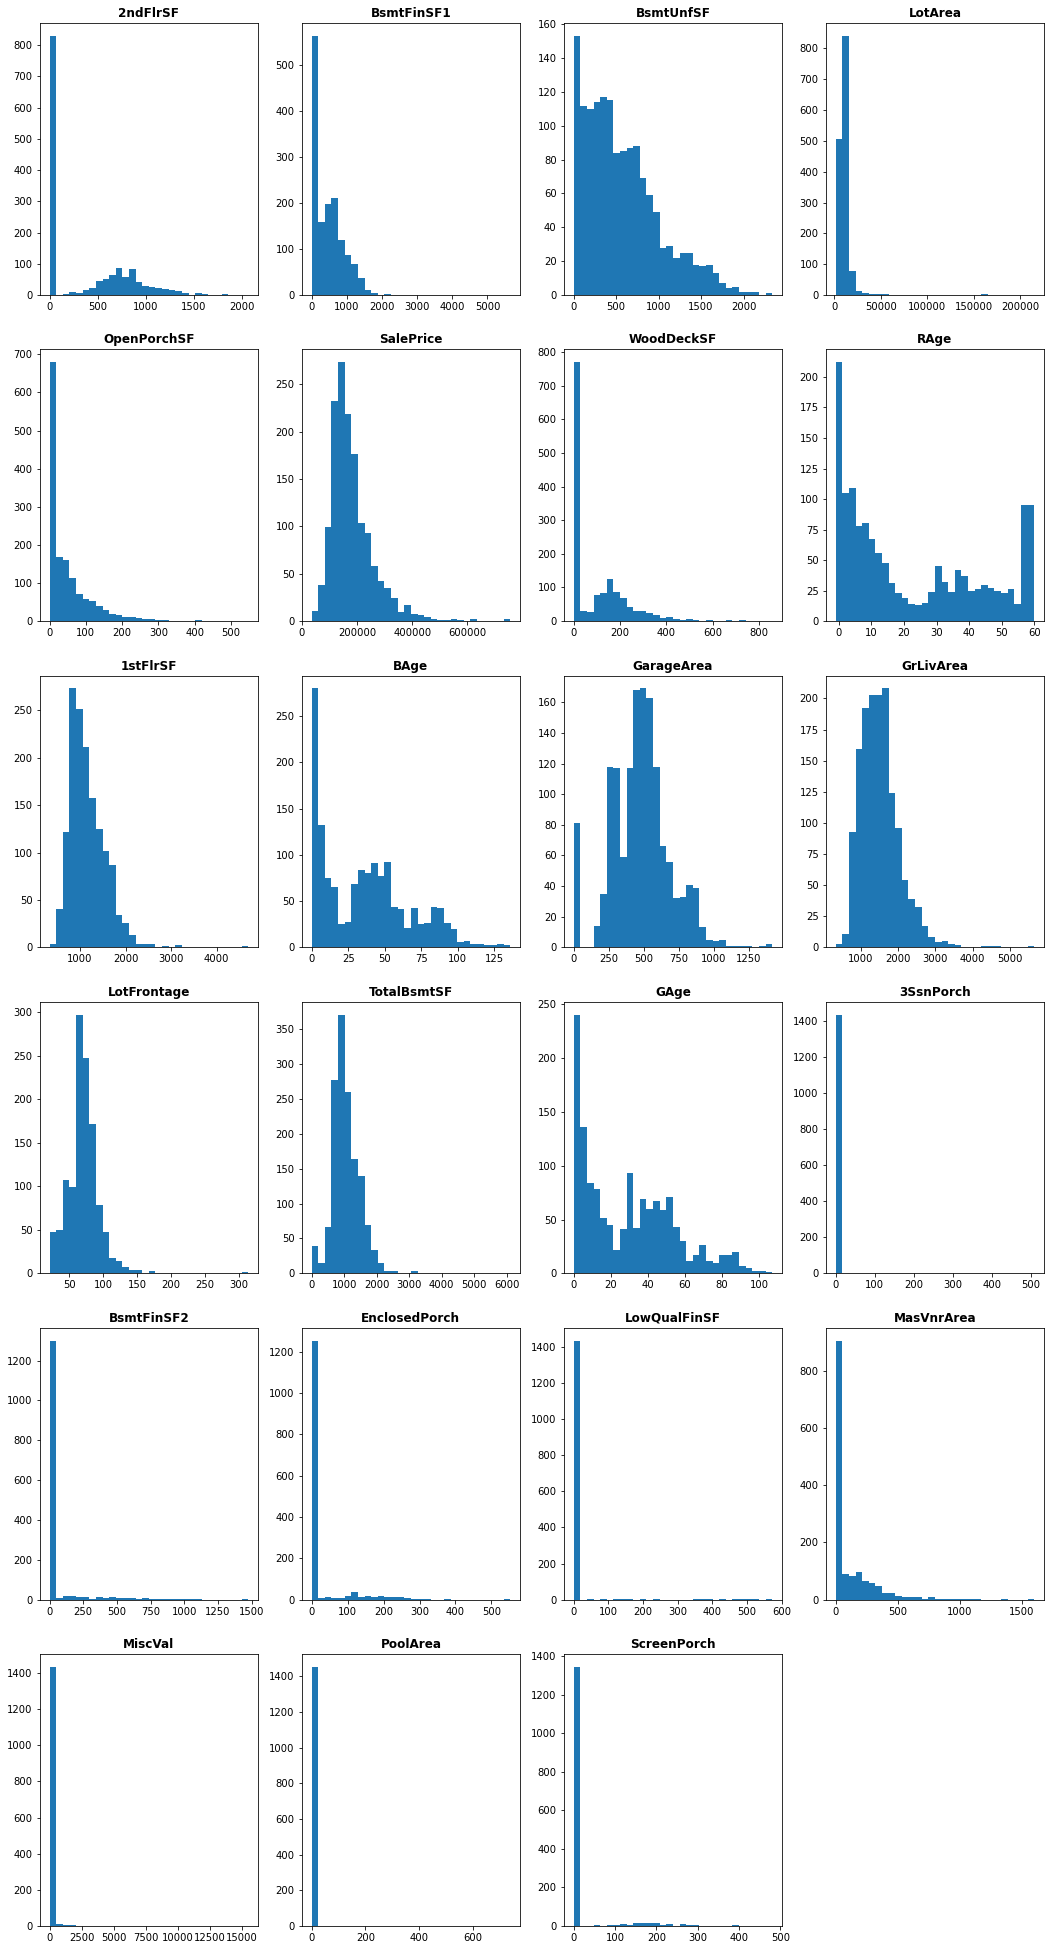

In [10]:
houN=houds2[varNum]
plt.figure(figsize=(18,35))
a=1
for i in houN.columns:
    plt.subplot(6,4,a)
    plt.hist(houN[i],bins=30)
    plt.title(i,fontweight ="bold")
    a=a+1
    if a==24:
        break
plt.show()

In [11]:
varDrop2=['3SsnPorch','BsmtFinSF2','EnclosedPorch','LowQualFinSF','MasVnrArea','MiscVal','PoolArea','ScreenPorch']
houds2=houds2.drop(varDrop2,axis=1)

In [12]:
varNum2=['2ndFlrSF','BsmtFinSF1','BsmtUnfSF','LotArea','OpenPorchSF','SalePrice','WoodDeckSF','RAge','1stFlrSF','BAge','GarageArea','GrLivArea','LotFrontage','TotalBsmtSF','GAge']

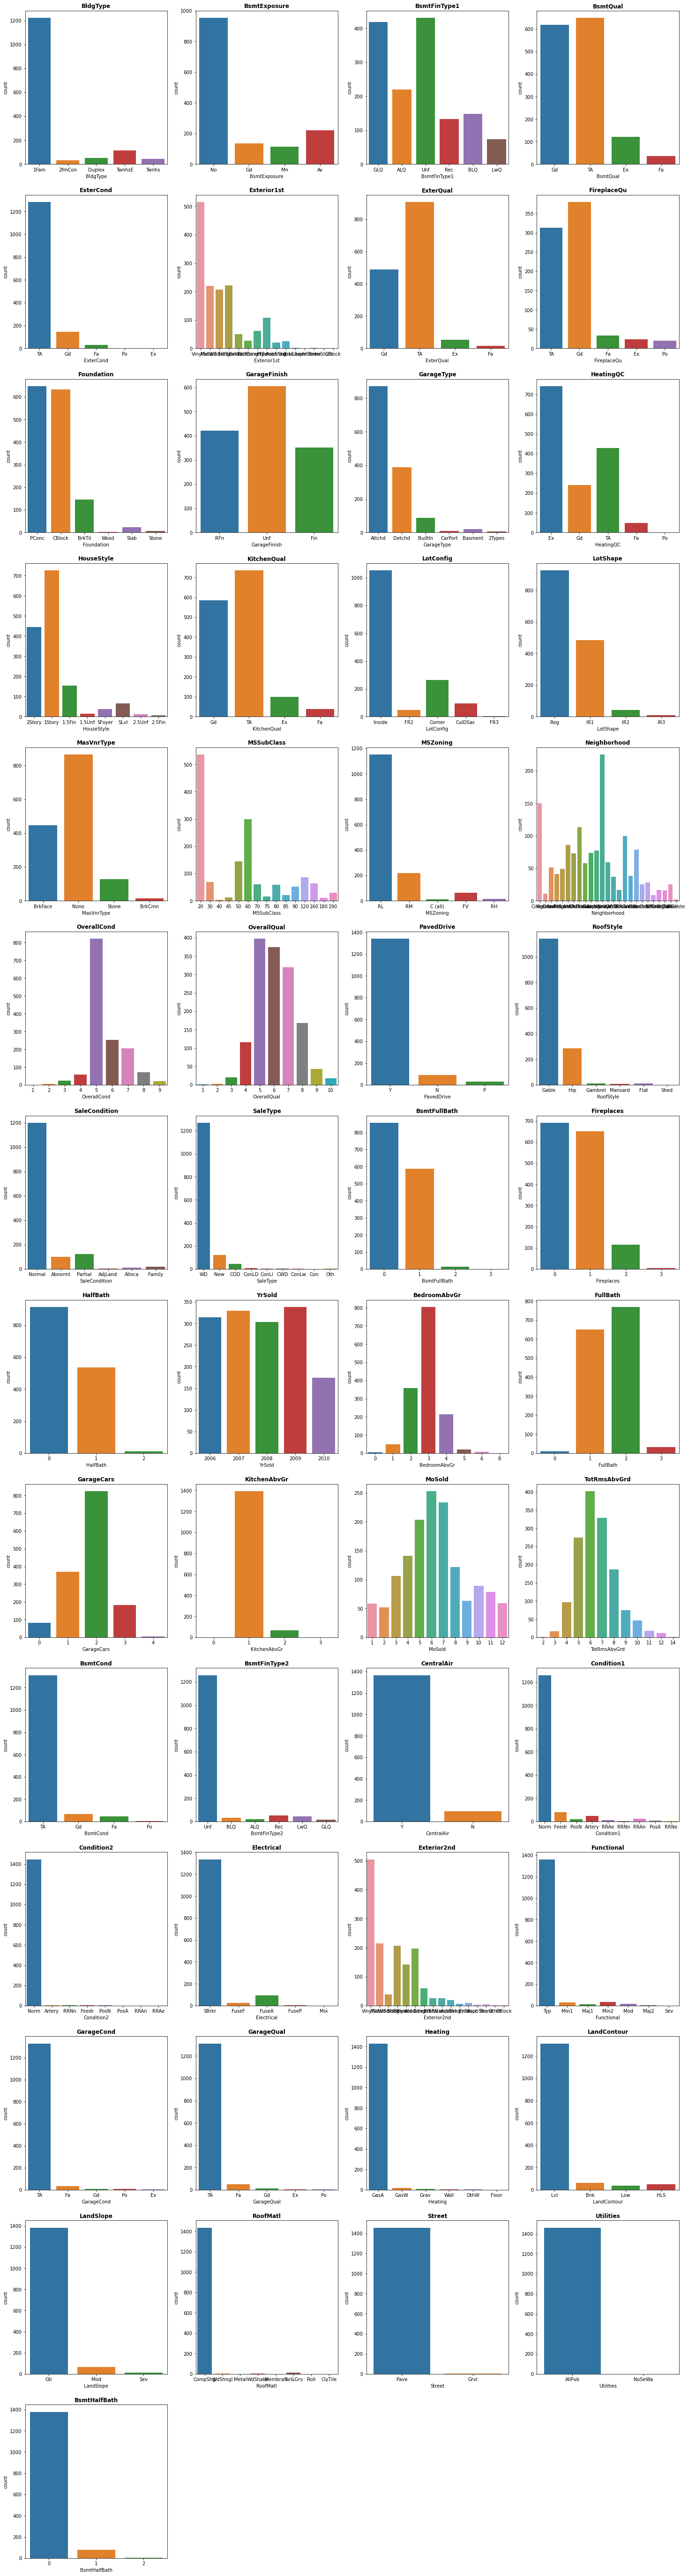

In [13]:
houCat=houds2[varCat]
plt.figure(figsize=(25,100))
a=1
for i in houCat.columns:
    plt.subplot(14,4,a)
    sbn.countplot(houCat[i])
    plt.title(i,fontweight ="bold")
    a=a+1
    if a==54:
        break
plt.show()

In [14]:
varDrop3=['KitchenAbvGr','BsmtCond','BsmtFinType2','BsmtHalfBath','CentralAir','Condition1','Condition2','Electrical','ExterCond','Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope','RoofMatl','Street','Utilities']
houds2=houds2.drop(varDrop3,axis=1)

In [15]:
varCat2=['BsmtFullBath','Fireplaces','HalfBath','YrSold','BedroomAbvGr','FullBath','GarageCars','MoSold','TotRmsAbvGrd','BldgType','BsmtExposure','BsmtFinType1','BsmtQual','Exterior1st','Exterior2nd','ExterQual','FireplaceQu','Foundation','GarageFinish','GarageType','HeatingQC','HouseStyle','KitchenQual','LotConfig','LotShape','MasVnrType','MSSubClass','MSZoning','Neighborhood','OverallCond','OverallQual','PavedDrive','RoofStyle','SaleCondition','SaleType']


In [16]:
houds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtExpo

In [17]:
houds2["FireplaceQu"]=houds2["FireplaceQu"].fillna("NA")
houds2["GarageType"]=houds2["GarageType"].fillna("NA")
houds2["GarageFinish"]=houds2["GarageFinish"].fillna("NA")
houds2["BsmtQual"]=houds2["BsmtQual"].fillna("NA")
houds2["BsmtExposure"]=houds2["BsmtExposure"].fillna("NA")
houds2["BsmtFinType1"]=houds2["BsmtFinType1"].fillna("NA")
houds2["MasVnrType"]=houds2["MasVnrType"].fillna("None")

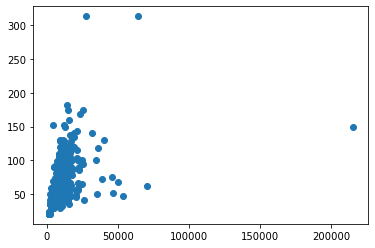

In [18]:
plt.scatter(houds2["LotArea"],houds2["LotFrontage"])

In [19]:
houds2=houds2.drop("LotFrontage",axis=1)

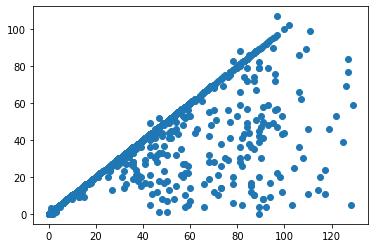

In [20]:
plt.scatter(houds2["BAge"],houds2["GAge"])

In [21]:
houds2=houds2.drop("GAge",axis=1)

In [22]:
houds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   LotShape       1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   OverallQual    1460 non-null   int64 
 9   OverallCond    1460 non-null   int64 
 10  RoofStyle      1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1460 non-null   object
 14  ExterQual      1460 non-null   object
 15  Foundation     1460 non-null   object
 16  BsmtQual       1460 non-null   object
 17  BsmtExposure   1460 non-null   object
 18  BsmtFinType1   1460 non-null

### Data Exploration

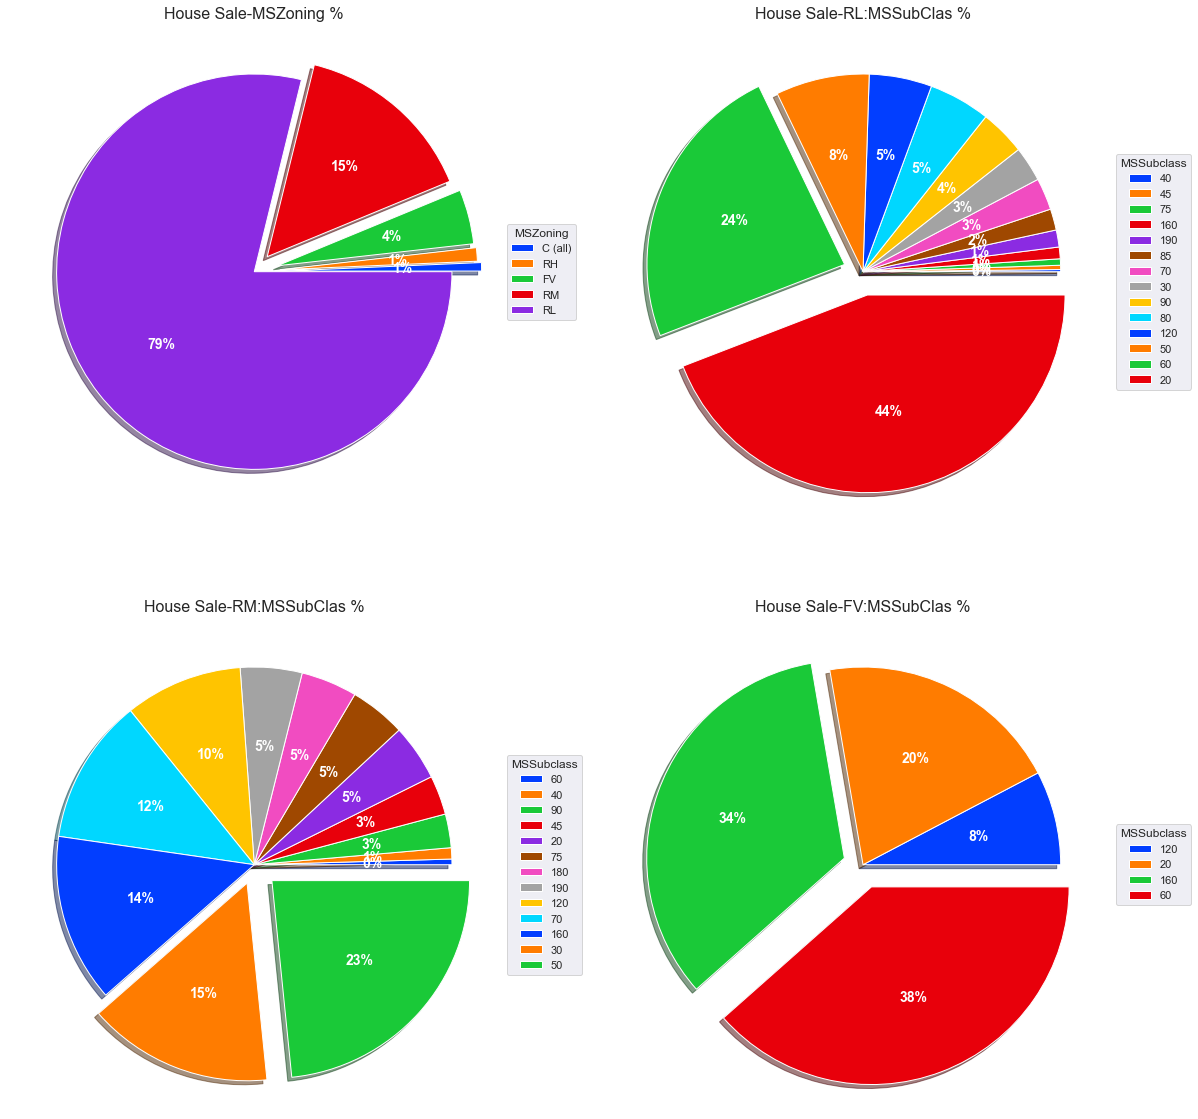

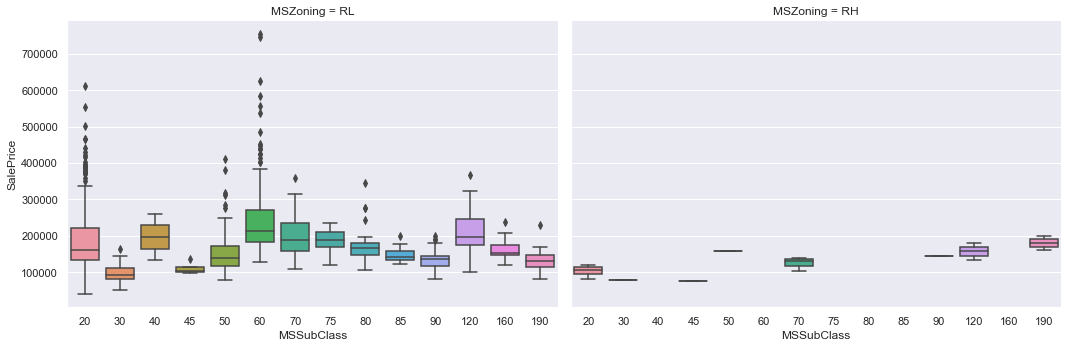

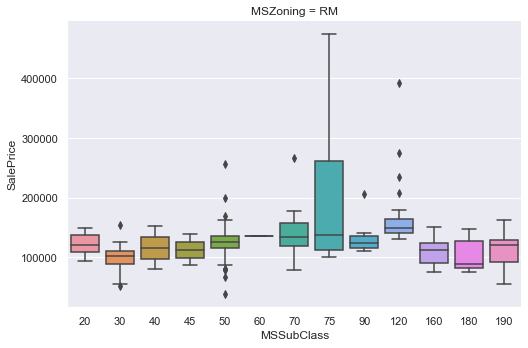

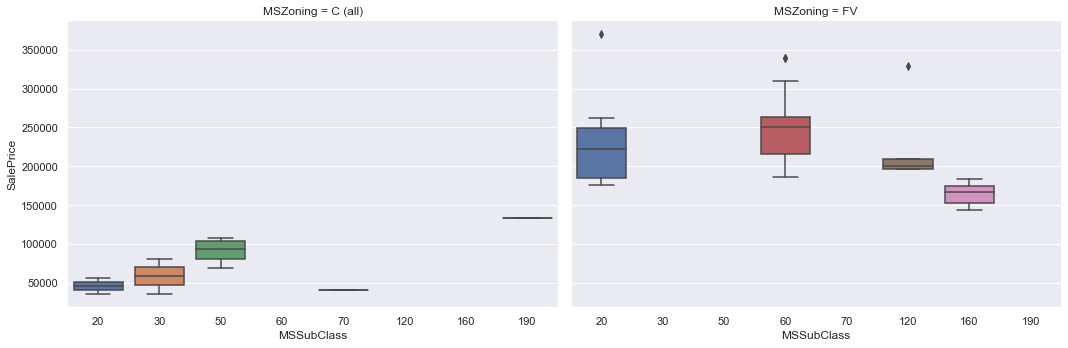

In [23]:
sbn.color_palette("tab10")
sbn.set(style="darkgrid")

arl=houds2[houds2["MSZoning"]=="RL"]
arh=houds2[houds2["MSZoning"]=="RH"]
arm=houds2[houds2["MSZoning"]=="RM"]
ac=houds2[houds2["MSZoning"]=="C (all)"]
afv=houds2[houds2["MSZoning"]=="FV"]

fig, ax=plt.subplots(figsize=(20,20),subplot_kw=dict(aspect="equal"))

ax = plt.subplot2grid((2,2),(0,0))
palette_color = sbn.color_palette('bright')
sbn.set_style("darkgrid")

labels=['C (all)','RH','FV','RM','RL']
mshou=houds2.groupby(["MSZoning"])["MSZoning"].count().sort_values(ascending=True)
pie_chart_exploded = (0.15, 0.13, 0.12, 0.1, 0)
wedges, texts, autotexts=ax.pie(mshou,labels=labels,colors=palette_color,autopct='%.0f%%',textprops=dict(color="w"),shadow=True,explode=pie_chart_exploded)
plt.legend(labels,title="MSZoning",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts,size=14, weight="bold")
ax.set_title("House Sale-MSZoning %",fontsize=16)

ax = plt.subplot2grid((2,2),(0,1))
labels1=['40','45','75','160','190','85','70','30','90','80','120','50','60','20']
arlsubhou=arl.groupby(["MSSubClass"])["MSSubClass"].count().sort_values(ascending=True)
pie_chart_exploded1 = (0, 0., 0, 0,0, 0, 0, 0.0,0, 0, 0, 0,0.1, 0.12)
wedges1, texts1, autotexts1=ax.pie(arlsubhou,labels=labels1,colors=palette_color,autopct='%.0f%%',textprops=dict(color="w"),shadow=True,explode=pie_chart_exploded1)
plt.legend(labels1,title="MSSubclass",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts1,size=14, weight="bold")
ax.set_title("House Sale-RL:MSSubClas %",fontsize=16)

ax = plt.subplot2grid((2,2),(1,0))
labels2=['60','40','90','45','20','75','180','190','120','70','160','30','50']
armsubhou=arm.groupby(["MSSubClass"])["MSSubClass"].count().sort_values(ascending=True)
pie_chart_exploded2 = (0, 0, 0,0, 0, 0, 0.0,0, 0, 0, 0,0.1, 0.12)
wedges2, texts2, autotexts2=ax.pie(armsubhou,labels=labels2,colors=palette_color,autopct='%.0f%%',textprops=dict(color="w"),shadow=True,explode=pie_chart_exploded2)
plt.legend(labels2,title="MSSubclass",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts2,size=14, weight="bold")
ax.set_title("House Sale-RM:MSSubClas %",fontsize=16)

ax = plt.subplot2grid((2,2),(1,1))
labels3=['120','20','160','60']
afvsubhou=afv.groupby(["MSSubClass"])["MSSubClass"].count().sort_values(ascending=True)
pie_chart_exploded3 = (0,0,0.1, 0.12)
wedges3, texts3, autotexts3=ax.pie(afvsubhou,labels=labels3,colors=palette_color,autopct='%.0f%%',textprops=dict(color="w"),shadow=True,explode=pie_chart_exploded3)
plt.legend(labels3,title="MSSubclass",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts3,size=14, weight="bold")
ax.set_title("House Sale-FV:MSSubClas %",fontsize=16)



houLH=houds2[(houds2["MSZoning"]=="RL")|(houds2["MSZoning"]=="RH")]
houRM=houds2[(houds2["MSZoning"]=="RM")]
houCFV=houds2[(houds2["MSZoning"]=="C (all)")|(houds2["MSZoning"]=="FV")]

g1=sbn.catplot(x="MSSubClass", y="SalePrice",col="MSZoning", data=houLH, kind="box",height=5, aspect=1.5)
g2=sbn.catplot(x="MSSubClass", y="SalePrice",col="MSZoning", data=houRM, kind="box",height=5, aspect=1.5)
g3=sbn.catplot(x="MSSubClass", y="SalePrice",col="MSZoning", data=houCFV, kind="box",height=5, aspect=1.5)

### Outlier removal

In [24]:
houds2=houds2[~((houds["MSZoning"]=="RL") & (houds2["MSSubClass"]==20) & (houds2["SalePrice"]>290000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==30) & (houds2["SalePrice"]>150000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==45) & (houds2["SalePrice"]>120000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==50) & (houds2["SalePrice"]>220000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==60) & (houds2["SalePrice"]>340000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==70) & (houds2["SalePrice"]>340000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==80) & (houds2["SalePrice"]>200000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==85) & (houds2["SalePrice"]>190000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==90) & (houds2["SalePrice"]>180000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==120) & (houds2["SalePrice"]>320000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==160) & (houds2["SalePrice"]>170000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==190) & (houds2["SalePrice"]>170000))]
houds2=houds2[~((houds2["MSZoning"]=="RL") & (houds2["MSSubClass"]==160) & (houds2["SalePrice"]<130000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==30) & (houds2["SalePrice"]>130000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==50) & (houds2["SalePrice"]>130000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==70) & (houds2["SalePrice"]>140000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==90) & (houds2["SalePrice"]>150000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==120) & (houds2["SalePrice"]>180000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==30) & (houds2["SalePrice"]<60000))]
houds2=houds2[~((houds2["MSZoning"]=="RM") & (houds2["MSSubClass"]==50) & (houds2["SalePrice"]<80000))]
houds2=houds2[~((houds2["MSZoning"]=="FV") & (houds2["MSSubClass"]==20) & (houds2["SalePrice"]>350000))]
houds2=houds2[~((houds2["MSZoning"]=="FV") & (houds2["MSSubClass"]==60) & (houds2["SalePrice"]>300000))]
houds2=houds2[~((houds2["MSZoning"]=="FV") & (houds2["MSSubClass"]==120) & (houds2["SalePrice"]>300000))]



<function matplotlib.pyplot.show(close=None, block=None)>

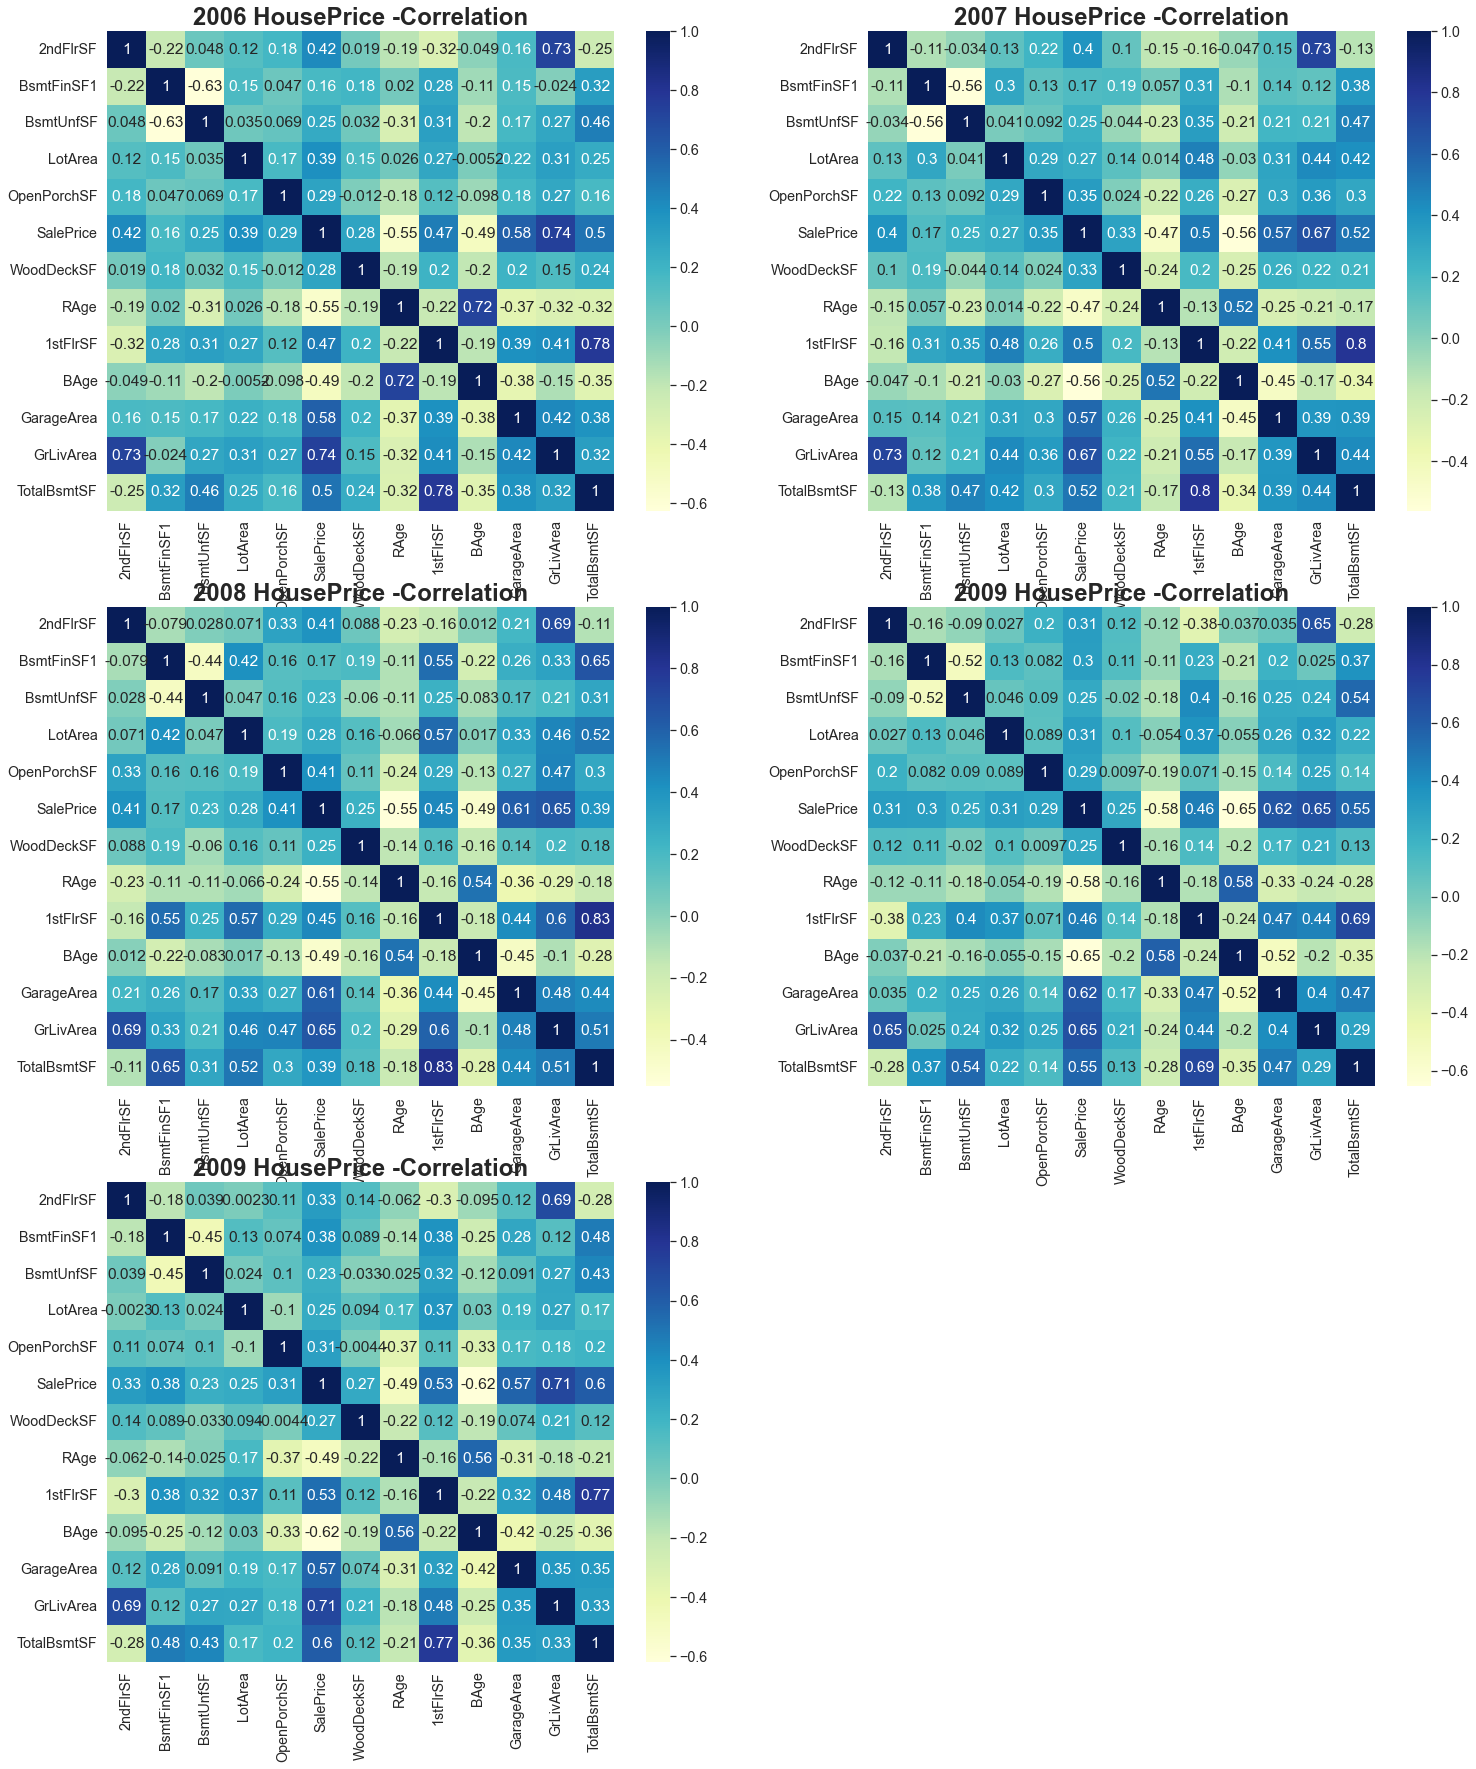

In [25]:
varNum2=['2ndFlrSF','BsmtFinSF1','BsmtUnfSF','LotArea','OpenPorchSF','SalePrice','WoodDeckSF','RAge','1stFlrSF','BAge','GarageArea','GrLivArea','TotalBsmtSF']

hou2006=houds2[houds2['YrSold']==2006][varNum2]
hou2007=houds2[houds2['YrSold']==2007][varNum2]
hou2008=houds2[houds2['YrSold']==2008][varNum2]
hou2009=houds2[houds2['YrSold']==2009][varNum2]
hou2010=houds2[houds2['YrSold']==2010][varNum2]

plt.figure(figsize=(25,30))
sbn.set(font_scale=1.3)
plt.subplot(3,2,1)
sbn.heatmap(hou2006.corr(),annot=True,cmap="YlGnBu").set_title("2006 HousePrice -Correlation",fontdict= { 'fontsize': 24, 'fontweight':'bold'})

plt.subplot(3,2,2)
sbn.heatmap(hou2007.corr(),annot=True,cmap="YlGnBu").set_title("2007 HousePrice -Correlation",fontdict= { 'fontsize': 24, 'fontweight':'bold'})

plt.subplot(3,2,3)
sbn.heatmap(hou2008.corr(),annot=True,cmap="YlGnBu").set_title("2008 HousePrice -Correlation",fontdict= { 'fontsize': 24, 'fontweight':'bold'})

plt.subplot(3,2,4)
sbn.heatmap(hou2009.corr(),annot=True,cmap="YlGnBu").set_title("2009 HousePrice -Correlation",fontdict= { 'fontsize': 24, 'fontweight':'bold'})

plt.subplot(3,2,5)
sbn.heatmap(hou2010.corr(),annot=True,cmap="YlGnBu").set_title("2009 HousePrice -Correlation",fontdict= { 'fontsize': 24, 'fontweight':'bold'})

#plt.suptitle("HousingFeature -Correlation")
plt.show
#'''

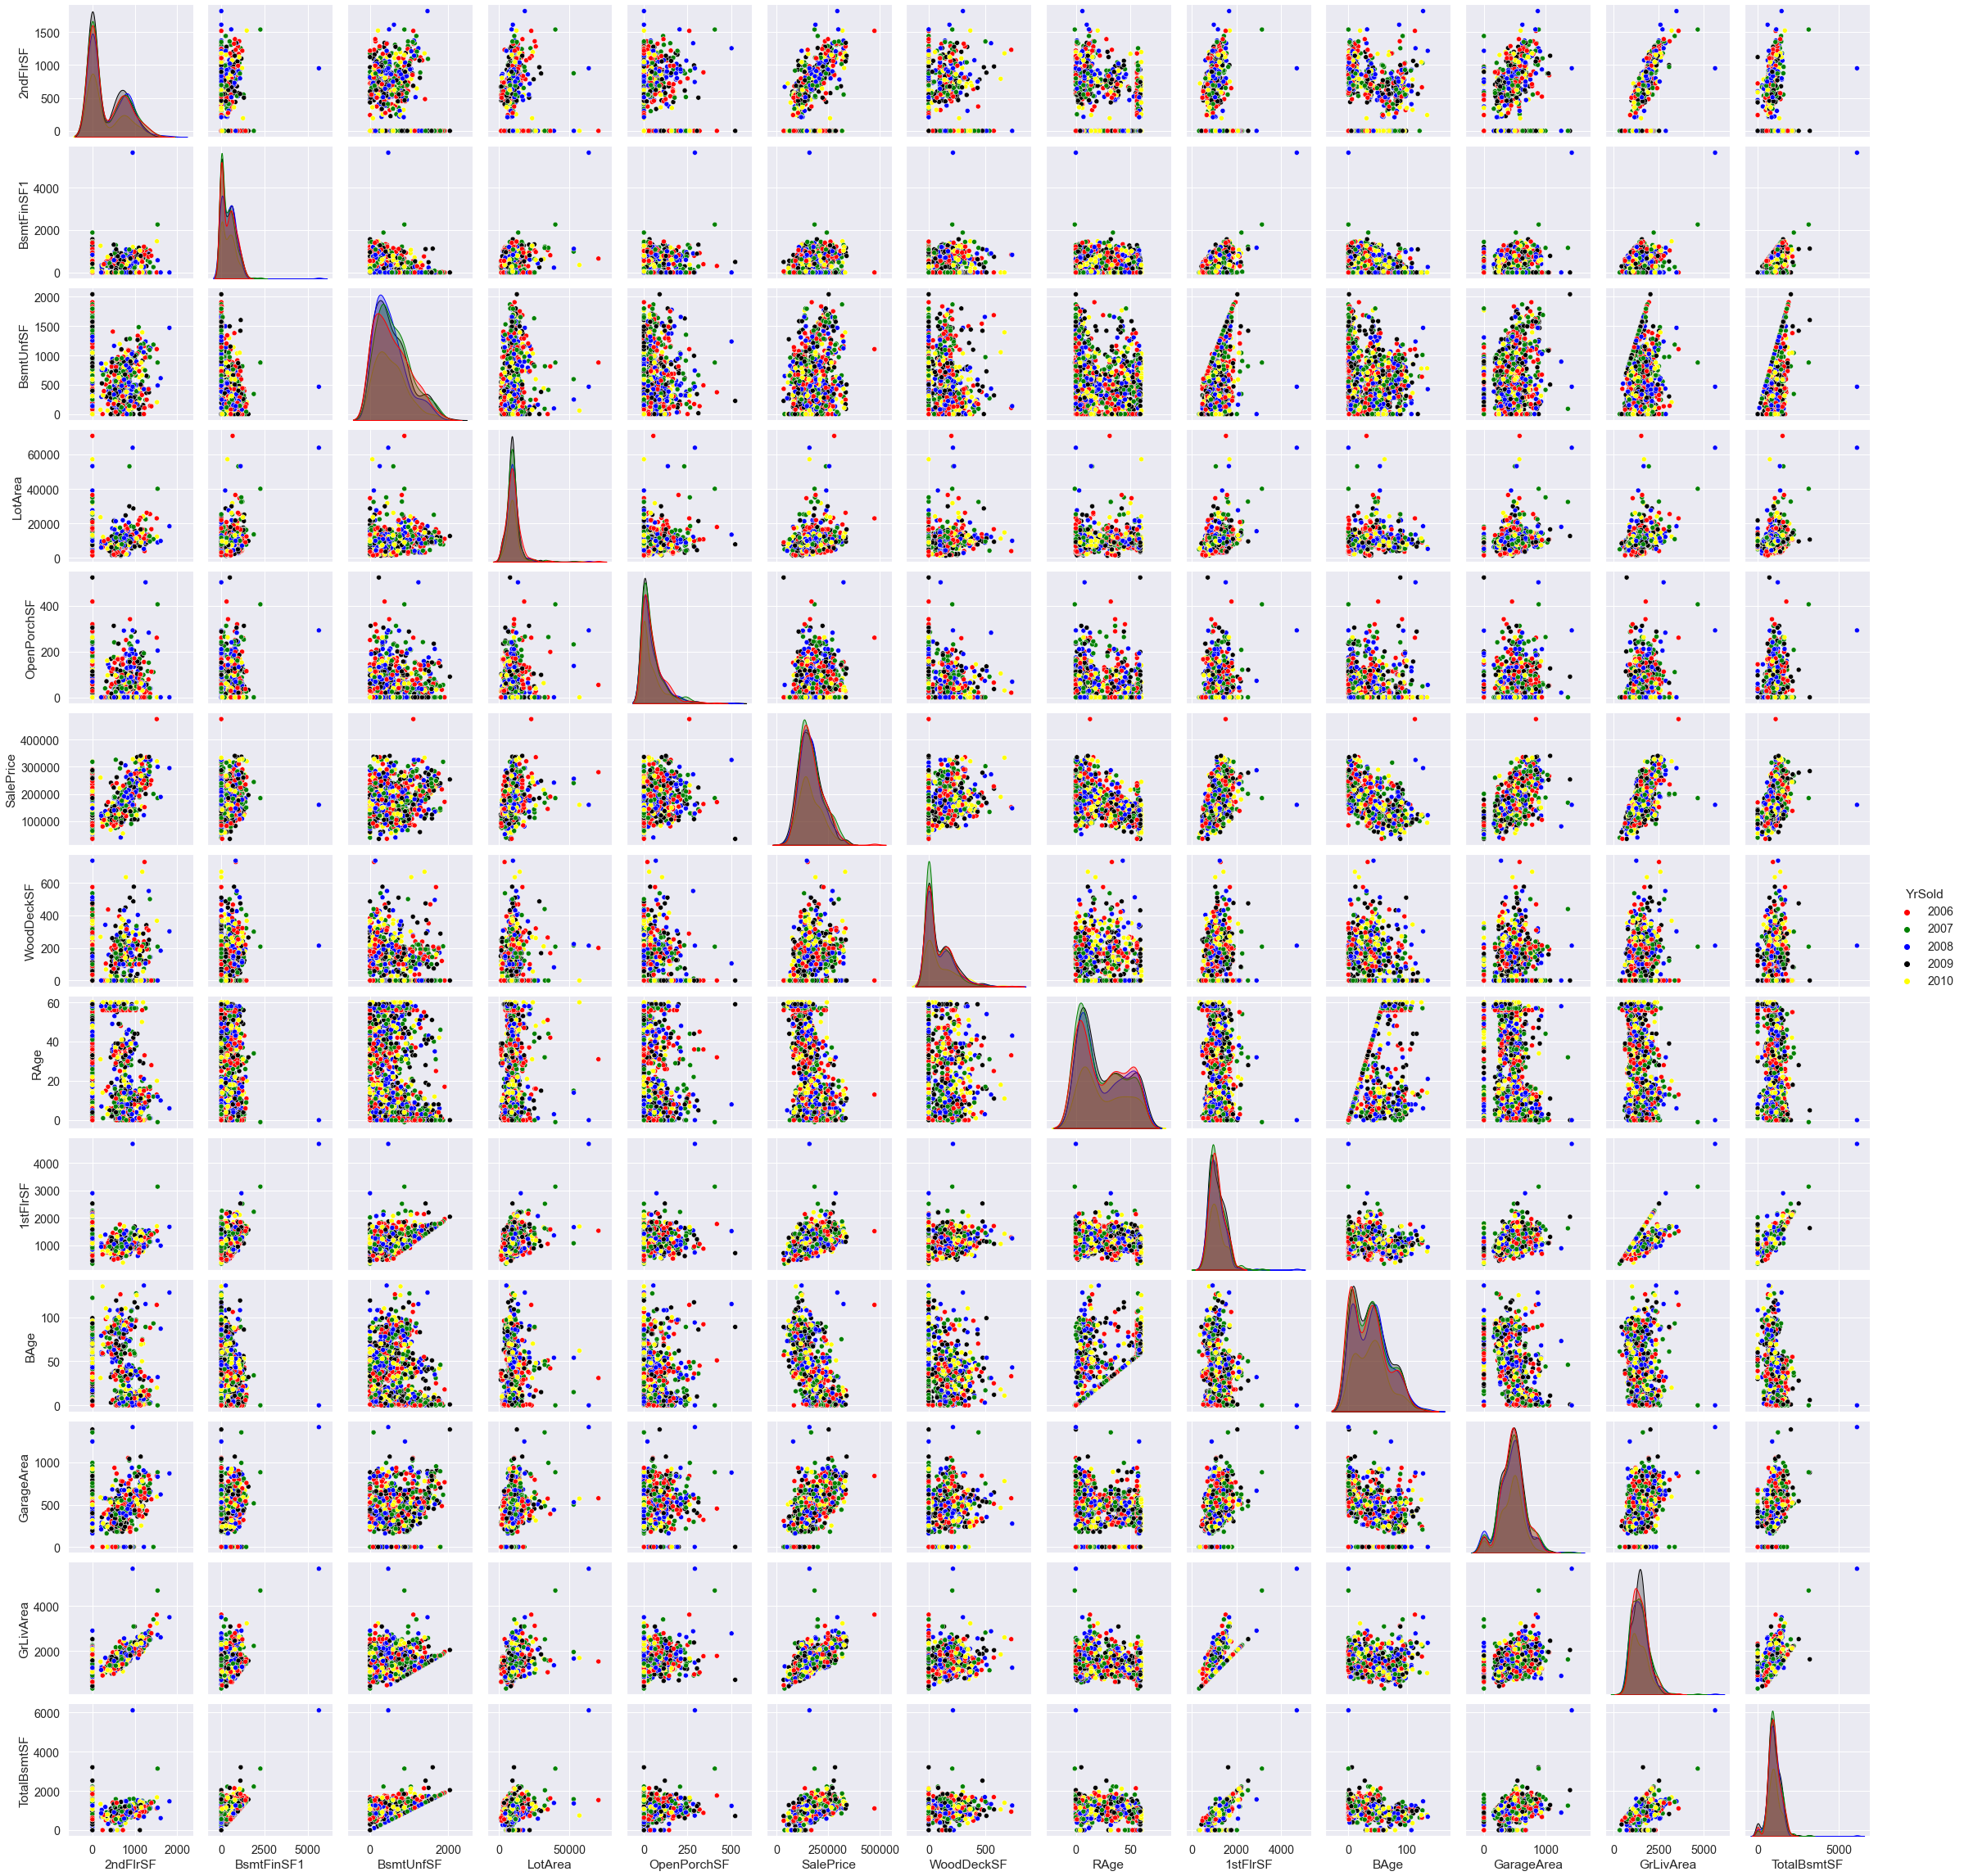

In [26]:
varPP=['2ndFlrSF','BsmtFinSF1','BsmtUnfSF','LotArea','OpenPorchSF','SalePrice','WoodDeckSF','RAge','1stFlrSF','BAge','GarageArea','GrLivArea','TotalBsmtSF',"YrSold"]
houplot=houds2[varPP]
palette1 = sbn.color_palette(["red","green","blue","black","yellow"])
sbn.pairplot(houplot,hue="YrSold",diag_kind = 'kde',palette=palette1)

In [27]:
varCat2=['BsmtFullBath','Fireplaces','HalfBath','YrSold','BedroomAbvGr','FullBath','GarageCars','MoSold','TotRmsAbvGrd','BldgType','BsmtExposure','BsmtFinType1','BsmtQual','Exterior1st','Exterior2nd','ExterQual','FireplaceQu','Foundation','GarageFinish','GarageType','HeatingQC','HouseStyle','KitchenQual','LotConfig','LotShape','MasVnrType','MSSubClass','MSZoning','Neighborhood','OverallCond','OverallQual','PavedDrive','RoofStyle','SaleCondition','SaleType']


In [28]:
for i in varCat2:
    print(houds2[i].unique())

[1 0 2 3]
[0 1 2 3]
[1 0 2]
[2008 2007 2006 2009 2010]
[3 4 1 2 5 6 0 8]
[2 1 3 0]
[2 3 1 0 4]
[ 2  5  9 12 10 11  4  1  8  7  3  6]
[ 8  6  7  9  5  4 11 10 12  3  2 14]
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['No' 'Gd' 'Mn' 'Av' 'NA']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
['Gd' 'TA' 'NA' 'Ex' 'Fa']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'CemntBd' 'Plywood'
 'AsbShng' 'Stucco' 'WdShing' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'CBlock']
['Gd' 'TA' 'Ex' 'Fa']
['NA' 'TA' 'Gd' 'Fa' 'Po' 'Ex']
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
['RFn' 'Unf' 'Fin' 'NA']
['Attchd' 'Detchd' 'CarPort' 'BuiltIn' 'NA' 'Basment' '2Types']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gd' 'TA' 'Fa' 'Ex']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Reg' 'IR1' 'IR2' 'IR3']
['BrkF

In [29]:

houds2['BsmtExposure']=houds2['BsmtExposure'].replace(["Gd","NA"],["BE_Gd","BE_NA"])
houds2['BsmtFinType1']=houds2['BsmtFinType1'].replace(["Unf","NA"],["BF_Unf","BF_NA"])
houds2['BsmtQual']=houds2['BsmtQual'].replace(["Gd","TA","Ex","NA","Fa"],["BQ_Gd","BQ_TA","BQ_Ex","BQ_NA","BQ_Fa"])
houds2['Exterior1st']=houds2['Exterior1st'].replace(["Wd Sdng","VinylSd","MetalSd","HdBoard","BrkFace","Plywood","AsbShng","Stucco","AsphShn","Stone","ImStucc","CBlock"],["E1_Wd_Sdng","E1_VinylSd","E1_MetalSd","E1_HdBoard","E1_BrkFace","E1_Plywood","E1_AsbShng","E1_Stucco","E1_AsphShn","E1_Stone","E1_ImStucc","E1_CBlock"])
houds2['Exterior2nd']=houds2['Exterior2nd'].replace(["Wd Sdng","VinylSd","MetalSd","HdBoard","BrkFace","Plywood","AsbShng","Stucco","AsphShn","Stone","ImStucc","CBlock"],["E2_Wd_Sdng","E2_VinylSd","E2_MetalSd","E2_HdBoard","E2_BrkFace","E2_Plywood","E2_AsbShng","E2_Stucco","E2_AsphShn","E2_Stone","E2_ImStucc","E2_CBlock"])
houds2['ExterQual']=houds2['ExterQual'].replace(["Gd","TA","Ex","Fa"],["EQ_Gd","EQ_TA","EQ_Ex","EQ_Fa"])
houds2['FireplaceQu']=houds2['FireplaceQu'].replace(["Gd","TA","Ex","NA","Fa","Po"],["FQ_Gd","FQ_TA","FQ_Ex","FQ_NA","FQ_Fa","FQ_Po"])
houds2['Foundation']=houds2['Foundation'].replace(["CBlock","Stone"],["Foun_CBlock","Foun_Stone"])
houds2['GarageFinish']=houds2['GarageFinish'].replace(["Unf","NA"],["GF_Unf","GF_NA"])
houds2['HeatingQC']=houds2['HeatingQC'].replace(["Gd","TA","Ex","Po","Fa"],["HQ_Gd","HQ_TA","HQ_Ex","HQ_Po","HQ_Fa"])
houds2['KitchenQual']=houds2['KitchenQual'].replace(["Gd","TA","Ex","Fa"],["KQ_Gd","KQ_TA","KQ_Ex","KQ_Fa"])
houds2['MasVnrType']=houds2['MasVnrType'].replace(["BrkFace","Stone"],["MVT_BrkFace","MVT_Stone"])
houds2['SaleType']=houds2['SaleType'].replace(["WD"],["ST_WD"])
houds2['MSSubClass']=houds2['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],['1SN','1SO','1SO','1P5U','1P5F','2SN','2SO','2PFA','SOM','SF','DUA','1SPUD','1PDPUD','2SPUD','PUDM','2FCA'])
houds2['GarageType']=houds2['GarageType'].replace(["NA"],["GT_NA"])

### Dummie Variable creation

In [30]:
bldtyp=pd.get_dummies(houds2["BldgType"],drop_first=True)
bsmtexp=pd.get_dummies(houds2["BsmtExposure"],drop_first=True)
bsmtft=pd.get_dummies(houds2["BsmtFinType1"],drop_first=True)
bsmtql=pd.get_dummies(houds2["BsmtQual"],drop_first=True)
ext1=pd.get_dummies(houds2["Exterior1st"],drop_first=True)
ext2=pd.get_dummies(houds2["Exterior2nd"],drop_first=True)
extql=pd.get_dummies(houds2["ExterQual"],drop_first=True)
frpql=pd.get_dummies(houds2["FireplaceQu"],drop_first=True)
foun=pd.get_dummies(houds2["Foundation"],drop_first=True)
gf=pd.get_dummies(houds2["GarageFinish"],drop_first=True)
gt=pd.get_dummies(houds2["GarageType"],drop_first=True)
htql=pd.get_dummies(houds2["HeatingQC"],drop_first=True)
houst=pd.get_dummies(houds2["HouseStyle"],drop_first=True)
kitql=pd.get_dummies(houds2["KitchenQual"],drop_first=True)
lotcf=pd.get_dummies(houds2["LotConfig"],drop_first=True)
lotsh=pd.get_dummies(houds2["LotShape"],drop_first=True)
mvtyp=pd.get_dummies(houds2["MasVnrType"],drop_first=True)
mssub=pd.get_dummies(houds2["MSSubClass"],drop_first=True)
mszon=pd.get_dummies(houds2["MSZoning"],drop_first=True)
neigbr=pd.get_dummies(houds2["Neighborhood"],drop_first=True)
pvd=pd.get_dummies(houds2["PavedDrive"],drop_first=True)
rfst=pd.get_dummies(houds2["RoofStyle"],drop_first=True)
slcnd=pd.get_dummies(houds2["SaleCondition"],drop_first=True)
sltyp=pd.get_dummies(houds2["SaleType"],drop_first=True)



In [31]:
var3=[ 'LotArea','OverallQual', 'OverallCond','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold','SalePrice','BAge','RAge','MSZoning']
houds3=houds2[var3]

In [32]:
houds3=pd.concat([houds3,bldtyp,bsmtexp,bsmtft,bsmtql,ext1,ext2,extql,frpql,foun,gf,gt,htql,houst,kitql,lotcf,lotsh,mvtyp,mssub,neigbr,pvd,rfst,slcnd,sltyp],axis=1)

In [33]:
a=[]
for i in houds3.columns:
    print(i)

LotArea
OverallQual
OverallCond
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
MoSold
YrSold
SalePrice
BAge
RAge
MSZoning
2fmCon
Duplex
Twnhs
TwnhsE
BE_Gd
BE_NA
Mn
No
BF_NA
BF_Unf
BLQ
GLQ
LwQ
Rec
BQ_Fa
BQ_Gd
BQ_NA
BQ_TA
CemntBd
E1_AsbShng
E1_AsphShn
E1_BrkFace
E1_CBlock
E1_HdBoard
E1_ImStucc
E1_MetalSd
E1_Plywood
E1_Stone
E1_Stucco
E1_VinylSd
E1_Wd_Sdng
WdShing
CmentBd
E2_AsbShng
E2_AsphShn
E2_BrkFace
E2_CBlock
E2_HdBoard
E2_ImStucc
E2_MetalSd
E2_Plywood
E2_Stone
E2_Stucco
E2_VinylSd
E2_Wd_Sdng
Wd Shng
EQ_Fa
EQ_Gd
EQ_TA
FQ_Fa
FQ_Gd
FQ_NA
FQ_Po
FQ_TA
Foun_CBlock
Foun_Stone
PConc
Slab
Wood
GF_NA
GF_Unf
RFn
Attchd
Basment
BuiltIn
CarPort
Detchd
GT_NA
HQ_Fa
HQ_Gd
HQ_Po
HQ_TA
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
KQ_Fa
KQ_Gd
KQ_TA
CulDSac
FR2
FR3
Inside
IR2
IR3
Reg
MVT_BrkFace
MVT_Stone
None
1P5U
1SN
1SO
1SPUD
2FCA
2PFA
2SN
2SO
2SPUD
DUA
PUDM
SF
SOM
Blueste

In [34]:
var4=['LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold','SalePrice','BAge','RAge','2fmCon','Duplex','Twnhs','TwnhsE','BE_Gd','BE_NA','Mn','No','BF_NA','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_NA','BQ_TA','CemntBd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_CBlock','E1_HdBoard','E1_ImStucc','E1_MetalSd','E1_Plywood','E1_Stone','E1_Stucco','E1_VinylSd','E1_Wd_Sdng','WdShing','CmentBd','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_CBlock','E2_HdBoard','E2_ImStucc','E2_MetalSd','E2_Plywood','E2_Stone','E2_Stucco','E2_VinylSd','E2_Wd_Sdng','Other','Wd Shng','EQ_Fa','EQ_Gd','EQ_TA','FQ_Fa','FQ_Gd','FQ_NA','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_NA','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','GT_NA','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','1Story','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','None','1P5U','1SN','1SO','1SPUD','2FCA','2PFA','2SN','2SO','2SPUD','DUA','PUDM','SF','SOM','FV','RH','RL','RM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gable','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','New','Oth','ST_WD']


In [35]:
#print(houds3.iloc[:,150:200].info())

In [36]:
var5=['LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','BAge','RAge','2fmCon','Duplex','Twnhs','TwnhsE','BE_Gd','BE_NA','Mn','No','BF_NA','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_NA','BQ_TA','CemntBd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_CBlock','E1_HdBoard','E1_ImStucc','E1_MetalSd','E1_Plywood','E1_Stone','E1_Stucco','E1_VinylSd','E1_Wd_Sdng','WdShing','CmentBd','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_CBlock','E2_HdBoard','E2_ImStucc','E2_MetalSd','E2_Plywood','E2_Stone','E2_Stucco','E2_VinylSd','E2_Wd_Sdng','Wd Shng','EQ_Fa','EQ_Gd','EQ_TA','FQ_Fa','FQ_Gd','FQ_NA','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_NA','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','GT_NA','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','1Story','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','None','1P5U','1SN','1SO','1SPUD','2FCA','2PFA','2SN','2SO','2SPUD','DUA','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gable','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','New','Oth','ST_WD']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])


Features      VIF
122        DUA      inf
57   E2_CBlock      inf
22      Duplex      inf
88       GT_NA      inf
43   E1_CBlock      inf
80       GF_NA      inf
29       BF_NA      inf
37       BQ_NA      inf
8    GrLivArea  1822.45
6     1stFlrSF  1141.14

### Dropping BQ_NA,E2_CBlock,E1_CBlock,BF_NA,DUA,Duplex,GT_NA,GF_NA,GrLivArea,1stFlrSF

In [37]:
var5=['LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','BAge','RAge','2fmCon','Twnhs','TwnhsE','BE_Gd','BE_NA','Mn','No','BF_NA','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_TA','CemntBd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_HdBoard','E1_ImStucc','E1_MetalSd','E1_Plywood','E1_Stone','E1_Stucco','E1_VinylSd','E1_Wd_Sdng','WdShing','CmentBd','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_HdBoard','E2_ImStucc','E2_MetalSd','E2_Plywood','E2_Stone','E2_Stucco','E2_VinylSd','E2_Wd_Sdng','Wd Shng','EQ_Fa','EQ_Gd','EQ_TA','FQ_Fa','FQ_Gd','FQ_NA','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','1Story','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','None','1P5U','1SN','1SO','1SPUD','2FCA','2PFA','2SN','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gable','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','New','Oth','ST_WD']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])


Features     VIF
45    E1_VinylSd  452.32
58    E2_VinylSd  316.28
41    E1_MetalSd  207.21
39    E1_HdBoard  192.00
46    E1_Wd_Sdng  170.54
54    E2_MetalSd  139.40
143        Gable  133.82
52    E2_HdBoard  116.94
59    E2_Wd_Sdng  108.57
1    OverallQual   92.18

### Dropping E1_VinylSd,E2_VinylSd,E1_MetalSd,E1_HdBoard,E1_Wd_Sdng,E2_MetalSd,Gable,E2_HdBoard,E2_Wd_Sdng,'OverallQual'

In [38]:
var5=['LotArea','TotalBsmtSF','OverallCond','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','BAge','RAge','2fmCon','Twnhs','TwnhsE','BE_Gd','BE_NA','Mn','No','BF_NA','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_TA','CemntBd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','CmentBd','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','EQ_TA','FQ_Fa','FQ_Gd','FQ_NA','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','1Story','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','None','1P5U','1SN','1SO','1SPUD','2FCA','2PFA','2SN','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','New','Oth','ST_WD']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])


Features    VIF
1    TotalBsmtSF  84.48
10  TotRmsAbvGrd  84.08
57         FQ_NA  83.52
54         EQ_TA  78.51
95          None  61.31
77        1Story  49.11
2    OverallCond  47.26
12    GarageCars  47.13
43       CmentBd  46.87
34       CemntBd  45.67

### Dropping TotalBsmtSF,TotRmsAbvGrd,FQ_NA,EQ_TA,None,1Story,OverallCond,GarageCars,CmentBd,CemntBd

In [39]:
var5=['LotArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','BAge','RAge','2fmCon','Twnhs','TwnhsE','BE_Gd','BE_NA','Mn','No','BF_NA','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_TA','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','None','1P5U','1SN','1SO','1SPUD','2FCA','2PFA','2SN','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','New','Oth','ST_WD']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])

Features    VIF
86           None  55.48
21          BF_NA  42.60
16         TwnhsE  42.45
18          BE_NA  38.16
91           2FCA  36.18
141         ST_WD  35.73
14         2fmCon  35.47
139           New  35.27
7    BedroomAbvGr  34.15
90          1SPUD  34.11

### Dropping None,BF_NA,TwnhsE,BE_NA,2FCA,ST_WD,2fmCon,New,BedroomAbvGr,1SPUD

In [40]:
var5=['LotArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','BAge','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','BQ_TA','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_Unf','RFn','Attchd','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','2Story','SFoyer','SLvl','KQ_Fa','KQ_Gd','KQ_TA','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SN','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Y','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','Oth']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])

Features    VIF
11       BAge  27.84
5    FullBath  26.41
66     2Story  26.07
116         Y  24.63
54     Attchd  22.68
71      KQ_TA  22.34
85        2SN  19.28
102     NAmes  18.17
3    2ndFlrSF  17.60
24      BQ_TA  16.98

### Dropping BAge,FullBath,2Story,Y,Attchd,KQ_TA,2SN,NAmes,2ndFlrSF,BQ_TA

In [41]:
var5=['LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','PConc','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','SLvl','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Normal','Partial','CWD','Con','ConLD','ConLI','ConLw','Oth']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])

Features    VIF
6     GarageArea  12.88
114       Normal  12.62
62          SLvl  12.59
5     Fireplaces  12.28
82           SOM  11.73
45         PConc   9.80
0        LotArea   8.87
43   Foun_CBlock   8.80
2      BsmtUnfSF   8.34
58        1.5Unf   7.27

### Dropping GarageArea,Normal,SLvl,Fireplaces,SOM,PConc

In [42]:
var5=['LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Partial','CWD','Con','ConLD','ConLI','ConLw','Oth']

vifdata=houds3[var5]

vifhou=pd.DataFrame()
vifhou["Features"]=vifdata.columns
vifhou["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifhou["VIF"]=round(vifhou["VIF"],2)
vifhou=vifhou.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifhou)
display(df1.iloc[0:10,:])

Features   VIF
0      LotArea  8.17
2    BsmtUnfSF  7.86
55      1.5Unf  7.21
70        1P5U  7.08
11          No  6.86
1   BsmtFinSF1  6.51
7         RAge  5.65
12      BF_Unf  5.63
64      Inside  5.26
45      GF_Unf  4.85

## Estimate Model1 : Linear Regression
    ### Output : SalePrice
    ### Models for different MSZones are estimated separately

In [43]:
var6=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','BQ_Gd','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Plywood','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Plywood','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','Inside','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SO','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker','P','Gambrel','Hip','Mansard','Shed','AdjLand','Alloca','Family','Partial','CWD','Con','ConLD','ConLI','ConLw','Oth']

varcon1=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge']
                                
rlhou=houds3[houds3["MSZoning"]=="RL"][var6]
rmhou=houds3[houds3["MSZoning"]=="RM"][var6]
rhhou=houds3[houds3["MSZoning"]=="RH"][var6]
fvhou=houds3[houds3["MSZoning"]=="FV"][var6]
    

rlhou_train, rlhou_test=train_test_split(rlhou,train_size=.7,random_state=100)
rmhou_train, rmhou_test=train_test_split(rmhou,train_size=.7,random_state=100)
rhhou_train, rhhou_test=train_test_split(rhhou,train_size=.7,random_state=100)
fvhou_train, fvhou_test=train_test_split(fvhou,train_size=.7,random_state=100)

rlscaler=MinMaxScaler()
rmscaler=MinMaxScaler()
rhscaler=MinMaxScaler()
fvscaler=MinMaxScaler()

rlhou_train[varcon1]=rlscaler.fit_transform(rlhou_train[varcon1])
rmhou_train[varcon1]=rmscaler.fit_transform(rmhou_train[varcon1])
rhhou_train[varcon1]=rhscaler.fit_transform(rhhou_train[varcon1])
fvhou_train[varcon1]=fvscaler.fit_transform(fvhou_train[varcon1])

yrlhou_train=rlhou_train.pop("SalePrice")
yrmhou_train=rmhou_train.pop("SalePrice")
yrhhou_train=rhhou_train.pop("SalePrice")
yfvhou_train=fvhou_train.pop("SalePrice")

xrlhou_train=rlhou_train
xrmhou_train=rmhou_train
xrhhou_train=rhhou_train
xfvhou_train=fvhou_train

xrlhou_train_sm=sm.add_constant(xrlhou_train,has_constant='add')
xrmhou_train_sm=sm.add_constant(xrmhou_train,has_constant='add')
xrhhou_train_sm=sm.add_constant(xrhhou_train,has_constant='add')
xfvhou_train_sm=sm.add_constant(xfvhou_train,has_constant='add')


lrrlhou=sm.OLS(yrlhou_train,xrlhou_train_sm)
lrrmhou=sm.OLS(yrmhou_train,xrmhou_train_sm)
lrrhhou=sm.OLS(yrhhou_train,xrhhou_train_sm)
lrfvhou=sm.OLS(yfvhou_train,xfvhou_train_sm)

rlhoumodel=lrrlhou.fit()
rmhoumodel=lrrmhou.fit()
rhhoumodel=lrrhhou.fit()
fvhoumodel=lrfvhou.fit()

a=rlhoumodel.rsquared
b=rmhoumodel.rsquared
c=rhhoumodel.rsquared
d=fvhoumodel.rsquared
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(b,2),"\t","\tR2-Score-FV\t",round(d,2))

#print("Model Summary-RL\n",rlhoumodel.summary(),"\n\nModel Summary-RM\n",rmhoumodel.summary())

	R2 Score-RL	 0.81 	 	R2-Score-RM	 0.97 	 	R2-Score-RH	 0.97 	 	R2-Score-FV	 1.0


## Estimate RFE for LR model

In [44]:
sklrrl=LinearRegression()
sklrrm=LinearRegression()
sklrrh=LinearRegression()
sklrfv=LinearRegression()

sklrrl.fit(xrlhou_train_sm,yrlhou_train)
sklrrm.fit(xrmhou_train_sm,yrmhou_train)
sklrrh.fit(xrhhou_train_sm,yrhhou_train)
sklrfv.fit(xfvhou_train_sm,yfvhou_train)

rferl=RFE(sklrrl,6)
rferm=RFE(sklrrm,6)
rferh=RFE(sklrrh,6)
rfefv=RFE(sklrfv,6)

rferl.fit(xrlhou_train_sm,yrlhou_train)
rferm.fit(xrmhou_train_sm,yrmhou_train)
rferh.fit(xrhhou_train_sm,yrhhou_train)
rfefv.fit(xfvhou_train_sm,yfvhou_train)

df1=pd.DataFrame(list(zip(xrlhou_train_sm.columns,rferl.ranking_,rferl.support_)))
df2=pd.DataFrame(list(zip(xrmhou_train_sm.columns,rferm.ranking_,rferm.support_)))
df3=pd.DataFrame(list(zip(xrhhou_train_sm.columns,rferh.ranking_,rferh.support_)))
df4=pd.DataFrame(list(zip(xfvhou_train_sm.columns,rfefv.ranking_,rfefv.support_)))

df5=pd.concat([df1,df2,df3,df4],axis=1)
print("\t\tRFE-RL\t\tRFE-RM\t\t\tRFE-RH\t\t\tRFE-FV")
display(df5)


		RFE-RL		RFE-RM			RFE-RH			RFE-FV


0    1      2             0    1      2             0    1  \
0           const  111  False         const   95  False         const   41   
1         LotArea    1   True       LotArea   16  False       LotArea   35   
2      BsmtFinSF1    1   True    BsmtFinSF1    1   True    BsmtFinSF1   21   
3       BsmtUnfSF   10  False     BsmtUnfSF   59  False     BsmtUnfSF    1   
4    BsmtFullBath   39  False  BsmtFullBath   91  False  BsmtFullBath   40   
..            ...  ...    ...           ...  ...    ...           ...  ...   
113           Con  113  False           Con  105  False           Con  107   
114         ConLD   43  False         ConLD   70  False         ConLD  108   
115         ConLI   45  False         ConLI    6  False         ConLI  110   
116         ConLw   61  False         ConLw  112  False         ConLw  111   
117           Oth   13  False           Oth  113  False           Oth  112   

         2             0    1      2  
0    False         const   48  False  
1    False       LotArea    1   True  
2    False    BsmtFinSF1    1   True  
3     True     BsmtUnfSF    1   True  
4    False  BsmtFullBath    7  False  
..     ...           ...  ...    ...  
113  False           Con   21  False  
114  False         ConLD  103  False  
115  False         ConLI  104  False  
116  False         ConLw  106  False  
117  False           Oth  108  False  

[118 rows x 12 columns]

## Plot the Trained LR Model

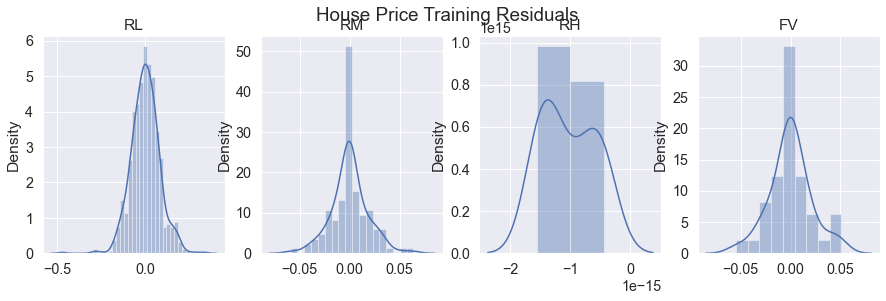

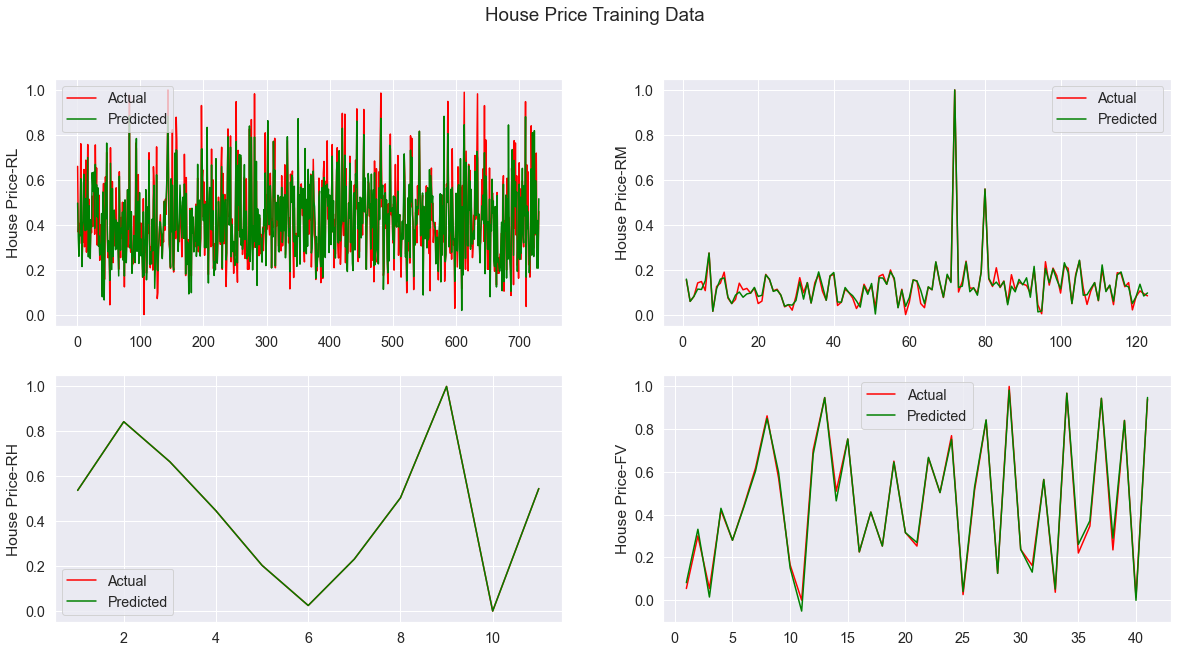

In [45]:
yrlhou_train_pred=rlhoumodel.predict(xrlhou_train_sm)
yrmhou_train_pred=rmhoumodel.predict(xrmhou_train_sm)
yrhhou_train_pred=rhhoumodel.predict(xrhhou_train_sm)
yfvhou_train_pred=fvhoumodel.predict(xfvhou_train_sm)

yrlhou_train_res=yrlhou_train-yrlhou_train_pred
yrmhou_train_res=yrmhou_train-yrmhou_train_pred
yrhhou_train_res=yrhhou_train-yrhhou_train_pred
yfvhou_train_res=yfvhou_train-yfvhou_train_pred

x1=range(1,len(yrlhou_train)+1)
x2=range(1,len(yrmhou_train)+1)
x3=range(1,len(yrhhou_train)+1)
x4=range(1,len(yfvhou_train)+1)

plt.figure(figsize=(15,4))
plt.suptitle("House Price Training Residuals")
plt.subplot(1,4,1)
sbn.distplot(yrlhou_train_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_train_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_train_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_train_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Training Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_train,c="red",label="Actual")
plt.plot(x1,yrlhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_train,c="red",label="Actual")
plt.plot(x2,yrmhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_train,c="red",label="Actual")
plt.plot(x3,yrhhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_train,c="red",label="Actual")
plt.plot(x4,yfvhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()


## Find the Prediction & R2 Score for LR Model on Test data

In [46]:
rlhou_test[varcon1]=rlscaler.transform(rlhou_test[varcon1])
rmhou_test[varcon1]=rmscaler.transform(rmhou_test[varcon1])
rhhou_test[varcon1]=rhscaler.transform(rhhou_test[varcon1])
fvhou_test[varcon1]=fvscaler.transform(fvhou_test[varcon1])

yrlhou_test=rlhou_test.pop("SalePrice")
yrmhou_test=rmhou_test.pop("SalePrice")
yrhhou_test=rhhou_test.pop("SalePrice")
yfvhou_test=fvhou_test.pop("SalePrice")

xrlhou_test=rlhou_test
xrmhou_test=rmhou_test
xrhhou_test=rhhou_test
xfvhou_test=fvhou_test

xrlhou_test_sm=sm.add_constant(xrlhou_test,has_constant='add')
xrmhou_test_sm=sm.add_constant(xrmhou_test,has_constant='add')
xrhhou_test_sm=sm.add_constant(xrhhou_test,has_constant='add')
xfvhou_test_sm=sm.add_constant(xfvhou_test,has_constant='add')

yrlhou_test_pred=rlhoumodel.predict(xrlhou_test_sm)
yrmhou_test_pred=rmhoumodel.predict(xrmhou_test_sm)
yrhhou_test_pred=rhhoumodel.predict(xrhhou_test_sm)
yfvhou_test_pred=fvhoumodel.predict(xfvhou_test_sm)

a=r2_score(y_true=yrlhou_test,y_pred=yrlhou_test_pred)
b=r2_score(y_true=yrmhou_test,y_pred=yrmhou_test_pred)
c=r2_score(y_true=yrhhou_test,y_pred=yrhhou_test_pred)
d=r2_score(y_true=yfvhou_test,y_pred=yfvhou_test_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(c,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test
#ybike2018_test

	R2 Score-RL	 0.73 	 	R2-Score-RM	 -0.31 	 	R2-Score-RH	 -0.16 	 	R2-Score-FV	 -0.06


## Plot the test prediction for LR Model

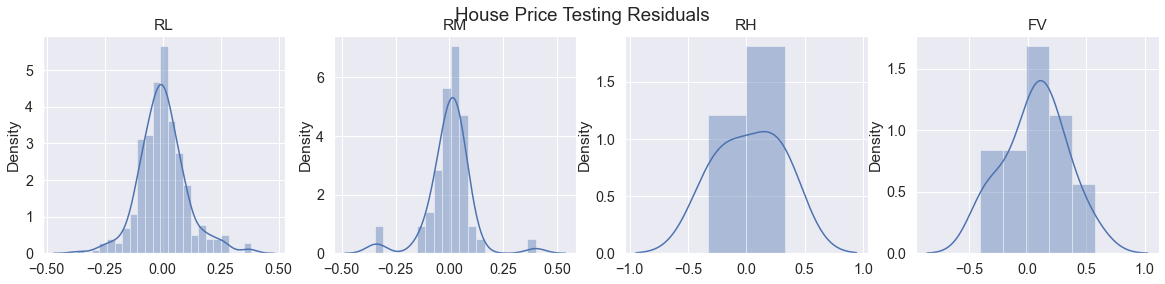

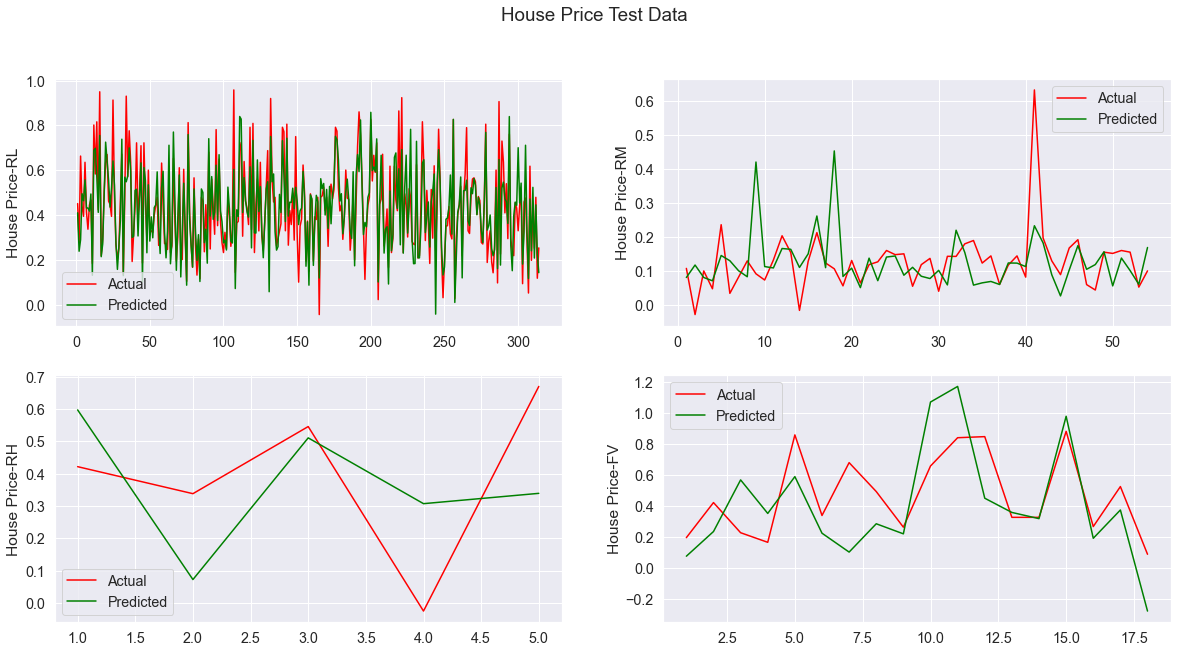

In [47]:
yrlhou_test_res=yrlhou_test-yrlhou_test_pred
yrmhou_test_res=yrmhou_test-yrmhou_test_pred
yrhhou_test_res=yrhhou_test-yrhhou_test_pred
yfvhou_test_res=yfvhou_test-yfvhou_test_pred

x1=range(1,len(yrlhou_test)+1)
x2=range(1,len(yrmhou_test)+1)
x3=range(1,len(yrhhou_test)+1)
x4=range(1,len(yfvhou_test)+1)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.suptitle("House Price Testing Residuals")
sbn.distplot(yrlhou_test_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_test_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_test_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_test_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Test Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_test,c="red",label="Actual")
plt.plot(x1,yrlhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_test,c="red",label="Actual")
plt.plot(x2,yrmhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_test,c="red",label="Actual")
plt.plot(x3,yrhhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_test,c="red",label="Actual")
plt.plot(x4,yfvhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()

## Estimate LR Model : Run-2
    ### Output : SalePrice
    ### Models for different MSZones are estimated separately

In [48]:
var6=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','Mitchel','NWAmes','NoRidge','NridgHt','OldTown','Sawyer','SawyerW','StoneBr','Timber','Veenker','P','Gambrel','Hip','AdjLand','Family','Oth']

varcon1=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge']
                                
rlhou=houds3[houds3["MSZoning"]=="RL"][var6]
rmhou=houds3[houds3["MSZoning"]=="RM"][var6]
rhhou=houds3[houds3["MSZoning"]=="RH"][var6]
fvhou=houds3[houds3["MSZoning"]=="FV"][var6]
    

rlhou_train, rlhou_test=train_test_split(rlhou,train_size=.7,random_state=100)
rmhou_train, rmhou_test=train_test_split(rmhou,train_size=.7,random_state=100)
rhhou_train, rhhou_test=train_test_split(rhhou,train_size=.7,random_state=100)
fvhou_train, fvhou_test=train_test_split(fvhou,train_size=.7,random_state=100)

rlscaler=MinMaxScaler()
rmscaler=MinMaxScaler()
rhscaler=MinMaxScaler()
fvscaler=MinMaxScaler()

rlhou_train[varcon1]=rlscaler.fit_transform(rlhou_train[varcon1])
rmhou_train[varcon1]=rmscaler.fit_transform(rmhou_train[varcon1])
rhhou_train[varcon1]=rhscaler.fit_transform(rhhou_train[varcon1])
fvhou_train[varcon1]=fvscaler.fit_transform(fvhou_train[varcon1])

yrlhou_train=rlhou_train.pop("SalePrice")
yrmhou_train=rmhou_train.pop("SalePrice")
yrhhou_train=rhhou_train.pop("SalePrice")
yfvhou_train=fvhou_train.pop("SalePrice")

xrlhou_train=rlhou_train
xrmhou_train=rmhou_train
xrhhou_train=rhhou_train
xfvhou_train=fvhou_train

xrlhou_train_sm=sm.add_constant(xrlhou_train,has_constant='add')
xrmhou_train_sm=sm.add_constant(xrmhou_train,has_constant='add')
xrhhou_train_sm=sm.add_constant(xrhhou_train,has_constant='add')
xfvhou_train_sm=sm.add_constant(xfvhou_train,has_constant='add')


lrrlhou=sm.OLS(yrlhou_train,xrlhou_train_sm)
lrrmhou=sm.OLS(yrmhou_train,xrmhou_train_sm)
lrrhhou=sm.OLS(yrhhou_train,xrhhou_train_sm)
lrfvhou=sm.OLS(yfvhou_train,xfvhou_train_sm)

rlhoumodel=lrrlhou.fit()
rmhoumodel=lrrmhou.fit()
rhhoumodel=lrrhhou.fit()
fvhoumodel=lrfvhou.fit()

a=rlhoumodel.rsquared
b=rmhoumodel.rsquared
c=rhhoumodel.rsquared
d=fvhoumodel.rsquared
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(b,2),"\t","\tR2-Score-FV\t",round(d,2))

#print("Model Summary-RL\n",rlhoumodel.summary(),"\n\nModel Summary-RM\n",rmhoumodel.summary())

	R2 Score-RL	 0.79 	 	R2-Score-RM	 0.96 	 	R2-Score-RH	 0.96 	 	R2-Score-FV	 0.97


## Estimate RFE for LR-2 Model

In [49]:
sklrrl=LinearRegression()
sklrrm=LinearRegression()
sklrrh=LinearRegression()
sklrfv=LinearRegression()

sklrrl.fit(xrlhou_train_sm,yrlhou_train)
sklrrm.fit(xrmhou_train_sm,yrmhou_train)
sklrrh.fit(xrhhou_train_sm,yrhhou_train)
sklrfv.fit(xfvhou_train_sm,yfvhou_train)

rferl=RFE(sklrrl,6)
rferm=RFE(sklrrm,6)
rferh=RFE(sklrrh,6)
rfefv=RFE(sklrfv,6)

rferl.fit(xrlhou_train_sm,yrlhou_train)
rferm.fit(xrmhou_train_sm,yrmhou_train)
rferh.fit(xrhhou_train_sm,yrhhou_train)
rfefv.fit(xfvhou_train_sm,yfvhou_train)

df1=pd.DataFrame(list(zip(xrlhou_train_sm.columns,rferl.ranking_,rferl.support_)))
df2=pd.DataFrame(list(zip(xrmhou_train_sm.columns,rferm.ranking_,rferm.support_)))
df3=pd.DataFrame(list(zip(xrhhou_train_sm.columns,rferh.ranking_,rferh.support_)))
df4=pd.DataFrame(list(zip(xfvhou_train_sm.columns,rfefv.ranking_,rfefv.support_)))

df5=pd.concat([df1,df2,df3,df4],axis=1)
print("\t\tRFE-RL\t\tRFE-RM\t\t\tRFE-RH\t\t\tRFE-FV")
display(df5)

		RFE-RL		RFE-RM			RFE-RH			RFE-FV


0   1      2             0   1      2             0   1      2  \
0          const  93  False         const  82  False         const  37  False   
1        LotArea   1   True       LotArea   5  False       LotArea  31  False   
2     BsmtFinSF1   1   True    BsmtFinSF1   1   True    BsmtFinSF1  17  False   
3      BsmtUnfSF   2  False     BsmtUnfSF   1   True     BsmtUnfSF   1   True   
4   BsmtFullBath  34  False  BsmtFullBath  35  False  BsmtFullBath  26  False   
..           ...  ..    ...           ...  ..    ...           ...  ..    ...   
94       Gambrel   1   True       Gambrel  64  False       Gambrel  24  False   
95           Hip  71  False           Hip  79  False           Hip   7  False   
96       AdjLand  68  False       AdjLand  91  False       AdjLand  91  False   
97        Family  30  False        Family  62  False        Family  92  False   
98           Oth  13  False           Oth  94  False           Oth  93  False   

               0   1      2  
0          const  20  False  
1        LotArea   1   True  
2     BsmtFinSF1   1   True  
3      BsmtUnfSF   1   True  
4   BsmtFullBath  30  False  
..           ...  ..    ...  
94       Gambrel  59  False  
95           Hip   8  False  
96       AdjLand  90  False  
97        Family  92  False  
98           Oth  93  False  

[99 rows x 12 columns]

## Find the Prediction & R2 Score for LR Model-2 on Test data

In [50]:
rlhou_test[varcon1]=rlscaler.transform(rlhou_test[varcon1])
rmhou_test[varcon1]=rmscaler.transform(rmhou_test[varcon1])
rhhou_test[varcon1]=rhscaler.transform(rhhou_test[varcon1])
fvhou_test[varcon1]=fvscaler.transform(fvhou_test[varcon1])

yrlhou_test=rlhou_test.pop("SalePrice")
yrmhou_test=rmhou_test.pop("SalePrice")
yrhhou_test=rhhou_test.pop("SalePrice")
yfvhou_test=fvhou_test.pop("SalePrice")

xrlhou_test=rlhou_test
xrmhou_test=rmhou_test
xrhhou_test=rhhou_test
xfvhou_test=fvhou_test

xrlhou_test_sm=sm.add_constant(xrlhou_test,has_constant='add')
xrmhou_test_sm=sm.add_constant(xrmhou_test,has_constant='add')
xrhhou_test_sm=sm.add_constant(xrhhou_test,has_constant='add')
xfvhou_test_sm=sm.add_constant(xfvhou_test,has_constant='add')


yrlhou_test_pred=rlhoumodel.predict(xrlhou_test_sm)
yrmhou_test_pred=rmhoumodel.predict(xrmhou_test_sm)
#yrhhou_test_pred=rhhoumodel.predict(xrhhou_test_sm)
yfvhou_test_pred=fvhoumodel.predict(xfvhou_test_sm)

a=r2_score(y_true=yrlhou_test,y_pred=yrlhou_test_pred)
b=r2_score(y_true=yrmhou_test,y_pred=yrmhou_test_pred)
#c=r2_score(y_true=yrhhou_test,y_pred=yrhhou_test_pred)
d=r2_score(y_true=yfvhou_test,y_pred=yfvhou_test_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(b,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test
#ybike2018_test

	R2 Score-RL	 0.72 	 	R2-Score-RM	 -0.18 	 	R2-Score-RH	 -0.18 	 	R2-Score-FV	 -0.22


## Estimate Model 4: Ridge Regression
    ### Output : SalePrice
    ### Models for different MSZones are estimated separately

In [74]:
var6=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','Mitchel','NWAmes','NoRidge','NridgHt','OldTown','Sawyer','SawyerW','StoneBr','Timber','Veenker','P','Gambrel','Hip','AdjLand','Family','Oth']

varcon1=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge']
                                
rlhou=houds3[houds3["MSZoning"]=="RL"][var6]
rmhou=houds3[houds3["MSZoning"]=="RM"][var6]
rhhou=houds3[houds3["MSZoning"]=="RH"][var6]
fvhou=houds3[houds3["MSZoning"]=="FV"][var6]
    

rlhou_train, rlhou_test=train_test_split(rlhou,train_size=.7,random_state=100)
rmhou_train, rmhou_test=train_test_split(rmhou,train_size=.7,random_state=100)
rhhou_train, rhhou_test=train_test_split(rhhou,train_size=.7,random_state=100)
fvhou_train, fvhou_test=train_test_split(fvhou,train_size=.7,random_state=100)

rlscaler=MinMaxScaler()
rmscaler=MinMaxScaler()
rhscaler=MinMaxScaler()
fvscaler=MinMaxScaler()

rlhou_train[varcon1]=rlscaler.fit_transform(rlhou_train[varcon1])
rmhou_train[varcon1]=rmscaler.fit_transform(rmhou_train[varcon1])
rhhou_train[varcon1]=rhscaler.fit_transform(rhhou_train[varcon1])
fvhou_train[varcon1]=fvscaler.fit_transform(fvhou_train[varcon1])

yrlhou_train=rlhou_train.pop("SalePrice")
yrmhou_train=rmhou_train.pop("SalePrice")
yrhhou_train=rhhou_train.pop("SalePrice")
yfvhou_train=fvhou_train.pop("SalePrice")

xrlhou_train=rlhou_train
xrmhou_train=rmhou_train
xrhhou_train=rhhou_train
xfvhou_train=fvhou_train

xrlhou_train_sm=sm.add_constant(xrlhou_train,has_constant='add')
xrmhou_train_sm=sm.add_constant(xrmhou_train,has_constant='add')
xrhhou_train_sm=sm.add_constant(xrhhou_train,has_constant='add')
xfvhou_train_sm=sm.add_constant(xfvhou_train,has_constant='add')

cvrl = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvrm = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvrh = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvfv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rlrdghoumodel = RidgeCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrl, scoring='neg_mean_absolute_error')
rmrdghoumodel = RidgeCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrm, scoring='neg_mean_absolute_error')
rhrdghoumodel = RidgeCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrh, scoring='neg_mean_absolute_error')
fvrdghoumodel = RidgeCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvfv, scoring='neg_mean_absolute_error')

rlrdghoumodel.fit(xrlhou_train_sm,yrlhou_train)
rmrdghoumodel.fit(xrmhou_train_sm,yrmhou_train)
rhrdghoumodel.fit(xrhhou_train_sm,yrhhou_train)
fvrdghoumodel.fit(xfvhou_train_sm,yfvhou_train)

print("Ridge Alpha \t RL\t RM \tRH \t\tFV")
print("Values:\t\t",rlrdghoumodel.alpha_,'\t',rmrdghoumodel.alpha_,'\t',rhrdghoumodel.alpha_,'\t',fvrdghoumodel.alpha_,"\n\n")

a1=pd.DataFrame([xrlhou_train_sm.columns,rlrdghoumodel.coef_]).T
a1.rename(columns ={0:"Parm1",1:"Coeff1"}, inplace = True)
a2=pd.DataFrame([xrmhou_train_sm.columns,rmrdghoumodel.coef_]).T
a2.rename(columns ={0:"Parm2",1:"Coeff2"}, inplace = True)
a3=pd.DataFrame([xrhhou_train_sm.columns,rhrdghoumodel.coef_]).T
a3.rename(columns ={0:"Parm3",1:"Coeff3"}, inplace = True)
a4=pd.DataFrame([xfvhou_train_sm.columns,fvrdghoumodel.coef_]).T
a4.rename(columns ={0:"Parm4",1:"Coeff4"}, inplace = True)

a5=pd.concat([a1,a2,a3,a4],axis=1)

b1=pd.DataFrame([xrlhou_train_sm.columns,abs(rlrdghoumodel.coef_)]).T
b1.rename(columns ={0:"Parm1",1:"Coeff1"}, inplace = True)
b1=b1.sort_values("Coeff1",ascending=False).reset_index(drop=True)
b2=pd.DataFrame([xrmhou_train_sm.columns,abs(rmrdghoumodel.coef_)]).T #, columns=["Parm2","Coeff2"])
b2.rename(columns ={0:"Parm2",1:"Coeff2"}, inplace = True)
b2=b2.sort_values("Coeff2",ascending=False).reset_index(drop=True)
b3=pd.DataFrame([xrhhou_train_sm.columns,abs(rhrdghoumodel.coef_)]).T #, columns=["Parm3","Coeff3"])
b3.rename(columns ={0:"Parm3",1:"Coeff3"}, inplace = True)
b3=b3.sort_values("Coeff3",ascending=False).reset_index(drop=True)
b4=pd.DataFrame([xfvhou_train_sm.columns,abs(fvrdghoumodel.coef_)]).T #, columns=["Parm4","Coeff4"])
b4.rename(columns ={0:"Parm4",1:"Coeff4"}, inplace = True)
b4=b4.sort_values("Coeff4",ascending=False).reset_index(drop=True)


b5=pd.concat([b1,b2,b3,b4],ignore_index=True,axis=1)
print("Actual Coefficients Top5: \t RL \t RM \t RH \tFV")
display(a5.iloc[:60,:],"\n")

print("Actual Coefficients Top5: \t RL \t RM \t RH \tFV")
display(b5.iloc[:5,:])

Ridge Alpha 	 RL	 RM 	RH 		FV
Values:		 4.0 	 1.0 	 1000.0 	 1.0 


Actual Coefficients Top5: 	 RL 	 RM 	 RH 	FV


Parm1    Coeff1         Parm2    Coeff2         Parm3    Coeff3  \
0          const       0.0         const       0.0         const       0.0   
1        LotArea  0.099871       LotArea  0.111621       LotArea  0.000135   
2     BsmtFinSF1  0.053787    BsmtFinSF1  0.045351    BsmtFinSF1 -0.000293   
3      BsmtUnfSF  0.087766     BsmtUnfSF  0.054479     BsmtUnfSF  0.000812   
4   BsmtFullBath  0.047883  BsmtFullBath  0.018065  BsmtFullBath -0.000093   
5       HalfBath  0.078562      HalfBath   0.03425      HalfBath       0.0   
6     WoodDeckSF  0.054556    WoodDeckSF  0.017955    WoodDeckSF -0.000355   
7    OpenPorchSF  0.059046   OpenPorchSF  0.024023   OpenPorchSF  0.000692   
8           RAge  -0.07711          RAge -0.030748          RAge -0.000464   
9          Twnhs -0.057484         Twnhs -0.008475         Twnhs       0.0   
10         BE_Gd  0.022898         BE_Gd  0.006453         BE_Gd       0.0   
11            Mn  0.014076            Mn  0.033533            Mn       0.0   
12            No -0.023054            No  0.003037            No -0.000074   
13        BF_Unf -0.021845        BF_Unf -0.004832        BF_Unf -0.000427   
14           BLQ -0.002568           BLQ  0.005673           BLQ -0.000109   
15           GLQ  0.028017           GLQ  0.012047           GLQ  0.000377   
16           LwQ    0.0153           LwQ  0.012889           LwQ  0.000541   
17           Rec  0.021453           Rec -0.013063           Rec -0.000465   
18         BQ_Fa -0.018993         BQ_Fa -0.009816         BQ_Fa       0.0   
19    E1_AsbShng -0.006486    E1_AsbShng -0.015931    E1_AsbShng       0.0   
20    E1_AsphShn -0.002912    E1_AsphShn       0.0    E1_AsphShn       0.0   
21    E1_BrkFace  0.074484    E1_BrkFace   0.00373    E1_BrkFace       0.0   
22    E1_ImStucc  0.012952    E1_ImStucc       0.0    E1_ImStucc       0.0   
23      E1_Stone  0.055514      E1_Stone       0.0      E1_Stone       0.0   
24     E1_Stucco  0.001019     E1_Stucco  0.042472     E1_Stucco       0.0   
25       WdShing -0.022939       WdShing -0.027017       WdShing       0.0   
26    E2_AsbShng  0.011658    E2_AsbShng  0.019056    E2_AsbShng -0.000427   
27    E2_AsphShn -0.019192    E2_AsphShn       0.0    E2_AsphShn       0.0   
28    E2_BrkFace -0.033814    E2_BrkFace -0.007471    E2_BrkFace       0.0   
29    E2_ImStucc -0.006743    E2_ImStucc -0.012461    E2_ImStucc       0.0   
30      E2_Stone -0.028635      E2_Stone       0.0      E2_Stone       0.0   
31     E2_Stucco  0.021079     E2_Stucco -0.020671     E2_Stucco   0.00021   
32       Wd Shng -0.036864       Wd Shng -0.011361       Wd Shng       0.0   
33         EQ_Fa -0.011017         EQ_Fa    0.0054         EQ_Fa  0.000114   
34         EQ_Gd  0.059888         EQ_Gd  0.062807         EQ_Gd  0.000386   
35         FQ_Fa  0.027178         FQ_Fa       0.0         FQ_Fa       0.0   
36         FQ_Gd  0.069106         FQ_Gd  0.039394         FQ_Gd       0.0   
37         FQ_Po -0.013083         FQ_Po -0.000598         FQ_Po       0.0   
38         FQ_TA  0.068923         FQ_TA   0.04665         FQ_TA  0.000083   
39   Foun_CBlock -0.041099   Foun_CBlock -0.011377   Foun_CBlock -0.000016   
40    Foun_Stone  0.019183    Foun_Stone  0.027495    Foun_Stone       0.0   
41          Slab -0.046077          Slab  0.014001          Slab  0.000083   
42          Wood  0.001579          Wood       0.0          Wood       0.0   
43        GF_Unf  -0.01632        GF_Unf  0.008278        GF_Unf -0.000465   
44           RFn  0.005662           RFn -0.002742           RFn       0.0   
45       Basment  0.020221       Basment  0.028841       Basment       0.0   
46       BuiltIn   0.02318       BuiltIn  0.001897       BuiltIn       0.0   
47       CarPort -0.036491       CarPort       0.0       CarPort -0.000427   
48        Detchd -0.016566        Detchd -0.006876        Detchd -0.000129   
49         HQ_Fa -0.015829         HQ_Fa -0.035509         HQ_Fa       0.0   
50         HQ_Gd -0.020319       

'\n'

Actual Coefficients Top5: 	 RL 	 RM 	 RH 	FV


0         1        2         3            4         5          6  \
0    NoRidge  0.171622   2.5Fin  0.183252    BsmtUnfSF  0.000812    LotArea   
1    LotArea  0.099871      IR2  0.141775      Edwards  0.000703      2SPUD   
2        1SO  0.095629  LotArea  0.111621  OpenPorchSF  0.000692    BuiltIn   
3  BsmtUnfSF  0.087766     2PFA  0.094132          1SN  0.000648      FQ_Gd   
4    StoneBr  0.087312   2.5Unf  0.078604        KQ_Fa   0.00059  MVT_Stone   

          7  
0  0.275262  
1  0.214129  
2  0.130785  
3  0.128705  
4  0.121058

## Plot the Trained Model : Ridge Regression

	R2 Score-RL	 0.78 	 	R2-Score-RM	 0.92 	 	R2-Score-RH	 0.01 	 	R2-Score-FV	 0.92


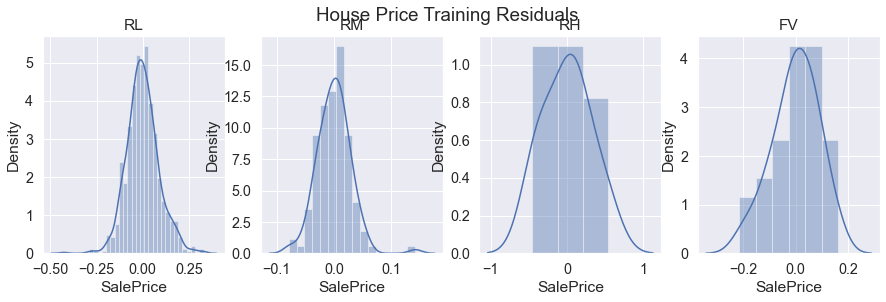

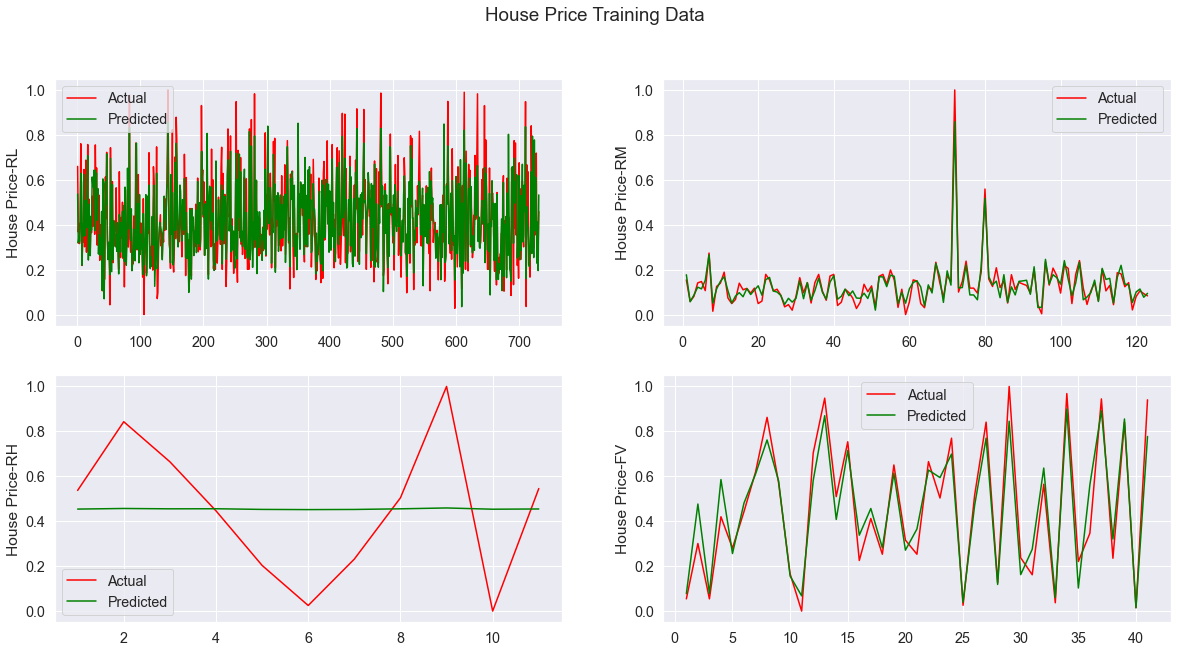

In [59]:
yrlhou_train_pred=rlrdghoumodel.predict(xrlhou_train_sm)
yrmhou_train_pred=rmrdghoumodel.predict(xrmhou_train_sm)
yrhhou_train_pred=rhrdghoumodel.predict(xrhhou_train_sm)
yfvhou_train_pred=fvrdghoumodel.predict(xfvhou_train_sm)

yrlhou_train_res=yrlhou_train-yrlhou_train_pred
yrmhou_train_res=yrmhou_train-yrmhou_train_pred
yrhhou_train_res=yrhhou_train-yrhhou_train_pred
yfvhou_train_res=yfvhou_train-yfvhou_train_pred

a=r2_score(y_true=yrlhou_train,y_pred=yrlhou_train_pred)
b=r2_score(y_true=yrmhou_train,y_pred=yrmhou_train_pred)
c=r2_score(y_true=yrhhou_train,y_pred=yrhhou_train_pred)
d=r2_score(y_true=yfvhou_train,y_pred=yfvhou_train_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(c,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test


x1=range(1,len(yrlhou_train)+1)
x2=range(1,len(yrmhou_train)+1)
x3=range(1,len(yrhhou_train)+1)
x4=range(1,len(yfvhou_train)+1)

plt.figure(figsize=(15,4))
plt.suptitle("House Price Training Residuals")
plt.subplot(1,4,1)
sbn.distplot(yrlhou_train_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_train_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_train_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_train_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Training Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_train,c="red",label="Actual")
plt.plot(x1,yrlhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_train,c="red",label="Actual")
plt.plot(x2,yrmhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_train,c="red",label="Actual")
plt.plot(x3,yrhhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_train,c="red",label="Actual")
plt.plot(x4,yfvhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()

## Find the Prediction & R2 Score on Test data : Ridge Regression

In [60]:
rlhou_test[varcon1]=rlscaler.transform(rlhou_test[varcon1])
rmhou_test[varcon1]=rmscaler.transform(rmhou_test[varcon1])
rhhou_test[varcon1]=rhscaler.transform(rhhou_test[varcon1])
fvhou_test[varcon1]=fvscaler.transform(fvhou_test[varcon1])

yrlhou_test=rlhou_test.pop("SalePrice")
yrmhou_test=rmhou_test.pop("SalePrice")
yrhhou_test=rhhou_test.pop("SalePrice")
yfvhou_test=fvhou_test.pop("SalePrice")

xrlhou_test=rlhou_test
xrmhou_test=rmhou_test
xrhhou_test=rhhou_test
xfvhou_test=fvhou_test

xrlhou_test_sm=sm.add_constant(xrlhou_test,has_constant='add')
xrmhou_test_sm=sm.add_constant(xrmhou_test,has_constant='add')
xrhhou_test_sm=sm.add_constant(xrhhou_test,has_constant='add')
xfvhou_test_sm=sm.add_constant(xfvhou_test,has_constant='add')


yrlhou_test_pred=rlrdghoumodel.predict(xrlhou_test_sm)
yrmhou_test_pred=rmrdghoumodel.predict(xrmhou_test_sm)
yrhhou_test_pred=rhrdghoumodel.predict(xrhhou_test_sm)
yfvhou_test_pred=fvrdghoumodel.predict(xfvhou_test_sm)

a=r2_score(y_true=yrlhou_test,y_pred=yrlhou_test_pred)
b=r2_score(y_true=yrmhou_test,y_pred=yrmhou_test_pred)
c=r2_score(y_true=yrhhou_test,y_pred=yrhhou_test_pred)
d=r2_score(y_true=yfvhou_test,y_pred=yfvhou_test_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(c,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test

	R2 Score-RL	 0.72 	 	R2-Score-RM	 0.32 	 	R2-Score-RH	 -0.07 	 	R2-Score-FV	 0.6


## Plot the test prediction: Ridge Regression

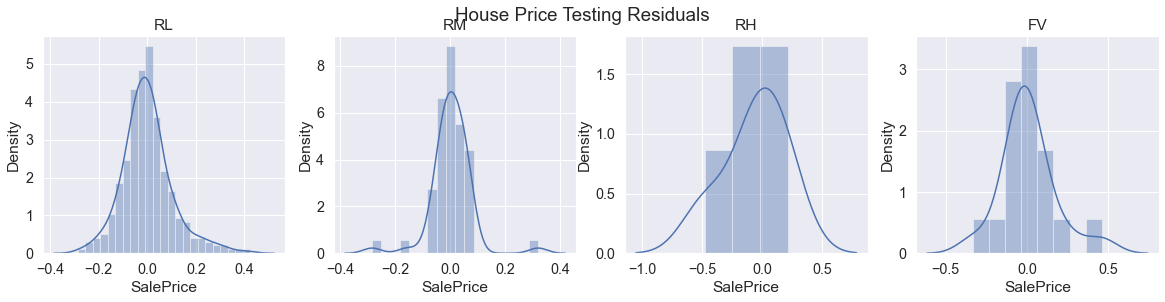

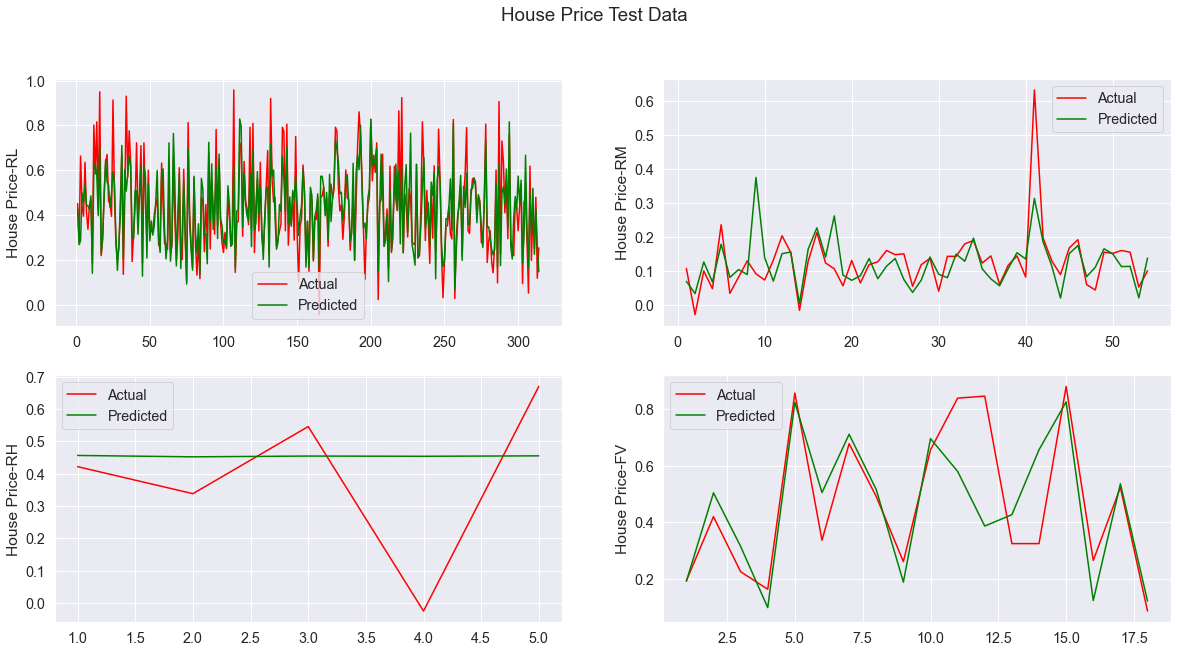

In [61]:
yrlhou_test_res=yrlhou_test-yrlhou_test_pred
yrmhou_test_res=yrmhou_test-yrmhou_test_pred
yrhhou_test_res=yrhhou_test-yrhhou_test_pred
yfvhou_test_res=yfvhou_test-yfvhou_test_pred

x1=range(1,len(yrlhou_test)+1)
x2=range(1,len(yrmhou_test)+1)
x3=range(1,len(yrhhou_test)+1)
x4=range(1,len(yfvhou_test)+1)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.suptitle("House Price Testing Residuals")
sbn.distplot(yrlhou_test_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_test_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_test_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_test_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Test Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_test,c="red",label="Actual")
plt.plot(x1,yrlhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_test,c="red",label="Actual")
plt.plot(x2,yrmhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_test,c="red",label="Actual")
plt.plot(x3,yrhhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_test,c="red",label="Actual")
plt.plot(x4,yfvhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()

## Estimate Model 5: Lasso Regression
    ### Output : SalePrice
    ### Models for year 2006 and year 2007 are estimated separately

In [72]:
var6=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge','Twnhs','BE_Gd','Mn','No','BF_Unf','BLQ','GLQ','LwQ','Rec','BQ_Fa','E1_AsbShng','E1_AsphShn','E1_BrkFace','E1_ImStucc','E1_Stone','E1_Stucco','WdShing','E2_AsbShng','E2_AsphShn','E2_BrkFace','E2_ImStucc','E2_Stone','E2_Stucco','Wd Shng','EQ_Fa','EQ_Gd','FQ_Fa','FQ_Gd','FQ_Po','FQ_TA','Foun_CBlock','Foun_Stone','Slab','Wood','GF_Unf','RFn','Basment','BuiltIn','CarPort','Detchd','HQ_Fa','HQ_Gd','HQ_Po','HQ_TA','1.5Unf','2.5Fin','2.5Unf','SFoyer','KQ_Fa','KQ_Gd','CulDSac','FR2','FR3','IR2','IR3','Reg','MVT_BrkFace','MVT_Stone','1P5U','1SN','1SO','2PFA','2SPUD','PUDM','SF','SOM','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','Mitchel','NWAmes','NoRidge','NridgHt','OldTown','Sawyer','SawyerW','StoneBr','Timber','Veenker','P','Gambrel','Hip','AdjLand','Family','Oth']

varcon1=["SalePrice",'LotArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath','HalfBath','WoodDeckSF','OpenPorchSF','RAge']
                                
rlhou=houds3[houds3["MSZoning"]=="RL"][var6]
rmhou=houds3[houds3["MSZoning"]=="RM"][var6]
rhhou=houds3[houds3["MSZoning"]=="RH"][var6]
fvhou=houds3[houds3["MSZoning"]=="FV"][var6]
    

rlhou_train, rlhou_test=train_test_split(rlhou,train_size=.7,random_state=100)
rmhou_train, rmhou_test=train_test_split(rmhou,train_size=.7,random_state=100)
rhhou_train, rhhou_test=train_test_split(rhhou,train_size=.7,random_state=100)
fvhou_train, fvhou_test=train_test_split(fvhou,train_size=.7,random_state=100)

rlscaler=MinMaxScaler()
rmscaler=MinMaxScaler()
rhscaler=MinMaxScaler()
fvscaler=MinMaxScaler()

rlhou_train[varcon1]=rlscaler.fit_transform(rlhou_train[varcon1])
rmhou_train[varcon1]=rmscaler.fit_transform(rmhou_train[varcon1])
rhhou_train[varcon1]=rhscaler.fit_transform(rhhou_train[varcon1])
fvhou_train[varcon1]=fvscaler.fit_transform(fvhou_train[varcon1])

yrlhou_train=rlhou_train.pop("SalePrice")
yrmhou_train=rmhou_train.pop("SalePrice")
yrhhou_train=rhhou_train.pop("SalePrice")
yfvhou_train=fvhou_train.pop("SalePrice")

xrlhou_train=rlhou_train
xrmhou_train=rmhou_train
xrhhou_train=rhhou_train
xfvhou_train=fvhou_train

xrlhou_train_sm=sm.add_constant(xrlhou_train,has_constant='add')
xrmhou_train_sm=sm.add_constant(xrmhou_train,has_constant='add')
xrhhou_train_sm=sm.add_constant(xrhhou_train,has_constant='add')
xfvhou_train_sm=sm.add_constant(xfvhou_train,has_constant='add')

cvrl = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvrm = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvrh = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvfv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rllsohoumodel = LassoCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrl, normalize=True)
rmlsohoumodel = LassoCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrm, normalize=True)
rhlsohoumodel = LassoCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvrh, normalize=True)
fvlsohoumodel = LassoCV(alphas=(0,.001,.01,.1,1,2,4,8,10,100,1000), cv=cvfv, normalize=True)

rllsohoumodel.fit(xrlhou_train_sm,yrlhou_train)
rmlsohoumodel.fit(xrmhou_train_sm,yrmhou_train)
rhlsohoumodel.fit(xrhhou_train_sm,yrhhou_train)
fvlsohoumodel.fit(xfvhou_train_sm,yfvhou_train)

print(rllsohoumodel.alpha_,'\t',rmlsohoumodel.alpha_,'\t',rhlsohoumodel.alpha_,'\t',fvlsohoumodel.alpha_)
print("X","\t","   Coefficients")

a1=pd.DataFrame([xrlhou_train_sm.columns,rllsohoumodel.coef_]).T
a1.rename(columns ={0:"Parm1",1:"Coeff1"}, inplace = True)
a2=pd.DataFrame([xrmhou_train_sm.columns,rmlsohoumodel.coef_]).T
a2.rename(columns ={0:"Parm2",1:"Coeff2"}, inplace = True)
a3=pd.DataFrame([xrhhou_train_sm.columns,rhlsohoumodel.coef_]).T
a3.rename(columns ={0:"Parm3",1:"Coeff3"}, inplace = True)
a4=pd.DataFrame([xfvhou_train_sm.columns,fvlsohoumodel.coef_]).T
a4.rename(columns ={0:"Parm4",1:"Coeff4"}, inplace = True)

a5=pd.concat([a1,a2,a3,a4],axis=1)

b1=pd.DataFrame([xrlhou_train_sm.columns,abs(rllsohoumodel.coef_)]).T
b1.rename(columns ={0:"Parm1",1:"Coeff1"}, inplace = True)
b1=b1.sort_values("Coeff1",ascending=False).reset_index(drop=True)
b2=pd.DataFrame([xrmhou_train_sm.columns,abs(rmlsohoumodel.coef_)]).T #, columns=["Parm2","Coeff2"])
b2.rename(columns ={0:"Parm2",1:"Coeff2"}, inplace = True)
b2=b2.sort_values("Coeff2",ascending=False).reset_index(drop=True)
b3=pd.DataFrame([xrhhou_train_sm.columns,abs(rhlsohoumodel.coef_)]).T #, columns=["Parm3","Coeff3"])
b3.rename(columns ={0:"Parm3",1:"Coeff3"}, inplace = True)
b3=b3.sort_values("Coeff3",ascending=False).reset_index(drop=True)
b4=pd.DataFrame([xfvhou_train_sm.columns,abs(fvlsohoumodel.coef_)]).T #, columns=["Parm4","Coeff4"])
b4.rename(columns ={0:"Parm4",1:"Coeff4"}, inplace = True)
b4=b4.sort_values("Coeff4",ascending=False).reset_index(drop=True)


b5=pd.concat([b1,b2,b3,b4],ignore_index=True,axis=1)
display(a5.iloc[60:120,:])
display(b5.iloc[:5,:])

0.0 	 0.001 	 1000.0 	 0.001
X 	    Coefficients


Parm1    Coeff1        Parm2    Coeff2        Parm3 Coeff3  \
60          FR2 -0.028268          FR2       0.0          FR2    0.0   
61          FR3       0.0          FR3       0.0          FR3    0.0   
62          IR2  0.024546          IR2  0.314272          IR2    0.0   
63          IR3 -0.012984          IR3      -0.0          IR3    0.0   
64          Reg -0.008897          Reg       0.0          Reg   -0.0   
65  MVT_BrkFace  0.027635  MVT_BrkFace       0.0  MVT_BrkFace    0.0   
66    MVT_Stone  0.030964    MVT_Stone       0.0    MVT_Stone    0.0   
67         1P5U  0.059888         1P5U      -0.0         1P5U    0.0   
68          1SN  -0.01411          1SN       0.0          1SN   -0.0   
69          1SO -0.116676          1SO -0.010347          1SO   -0.0   
70         2PFA  0.100955         2PFA       0.0         2PFA    0.0   
71        2SPUD  0.112931        2SPUD      -0.0        2SPUD    0.0   
72         PUDM       0.0         PUDM      -0.0         PUDM    0.0   
73           SF  0.054247           SF       0.0           SF    0.0   
74          SOM -0.039838          SOM       0.0          SOM    0.0   
75      Blueste       0.0      Blueste       0.0      Blueste    0.0   
76       BrDale       0.0       BrDale      -0.0       BrDale    0.0   
77      BrkSide   0.00883      BrkSide      -0.0      BrkSide    0.0   
78      ClearCr   0.07299      ClearCr       0.0      ClearCr    0.0   
79      CollgCr  0.015523      CollgCr       0.0      CollgCr    0.0   
80      Crawfor  0.093945      Crawfor       0.0      Crawfor    0.0   
81      Edwards -0.054966      Edwards       0.0      Edwards   -0.0   
82      Gilbert -0.011124      Gilbert       0.0      Gilbert    0.0   
83      Mitchel  0.007582      Mitchel  0.016891      Mitchel    0.0   
84       NWAmes  0.056296       NWAmes       0.0       NWAmes    0.0   
85      NoRidge  0.223623      NoRidge       0.0      NoRidge    0.0   
86      NridgHt  0.115209      NridgHt       0.0      NridgHt    0.0   
87      OldTown  0.001423      OldTown       0.0      OldTown    0.0   
88       Sawyer -0.029638       Sawyer       0.0       Sawyer    0.0   
89      SawyerW  0.014528      SawyerW       0.0      SawyerW   -0.0   
90      StoneBr  0.162145      StoneBr       0.0      StoneBr    0.0   
91       Timber   0.08444       Timber       0.0       Timber    0.0   
92      Veenker  0.086519      Veenker       0.0      Veenker    0.0   
93            P -0.039408            P      -0.0            P    0.0   
94      Gambrel  0.163496      Gambrel       0.0      Gambrel   -0.0   
95          Hip  0.014805          Hip       0.0          Hip    0.0   
96      AdjLand  0.024471      AdjLand       0.0      AdjLand    0.0   
97       Family -0.076161       Family      -0.0       Family    0.0   
98          Oth -0.139546          Oth       0.0          Oth    0.0   

          Parm4    Coeff4  
60          FR2 -0.049915  
61          FR3  0.034988  
62          IR2 -0.002422  
63          IR3       0.0  
64          Reg      -0.0  
65  MVT_BrkFace  0.063546  
66    MVT_Stone  0.093259  
67         1P5U       0.0  
68          1SN -0.141006  
69          1SO       0.0  
70         2PFA       0.0  
71        2SPUD -0.176869  
72         PUDM       0.0  
73           SF       0.0  
74          SOM       0.0  
75      Blueste       0.0  
76       BrDale       0.0  
77      BrkSide       0.0  
78      ClearCr       0.0  
79      CollgCr       0.0  
80      Crawfor       0.0  
81      Edwards       0.0  
82      Gilbert       0.0  
83      Mitchel       0.0  
84       NWAmes       0.0  
85      NoRidge       0.0  
86      NridgHt       0.0  
87      OldTown       0.0  
88       Sawyer       0.0  
89      SawyerW       0.0  
90      StoneBr       0.0  
91       Timber       0.0  
92      Veenker       0.0  
93            P       0.0  
94      Gambrel       0.0  
95          Hip  0.031551  
96      AdjLand       0.0  
97       Family       0.0  
98          Oth       0.0

0         1            2         3      4    5           6         7
0  E1_Stone  0.292015       2.5Fin  0.379886  const  0.0     LotArea  0.487278
1   NoRidge  0.223623          IR2  0.314272    SOM  0.0  BsmtFinSF1  0.187996
2   Gambrel  0.163496        EQ_Gd  0.026963   PUDM  0.0         Rec  0.177294
3   LotArea  0.162486   BsmtFinSF1  0.025425  2SPUD  0.0       2SPUD  0.176869
4    1.5Unf  0.162386  OpenPorchSF  0.024593   2PFA  0.0     BuiltIn  0.155417

## Plot the Trained Model : Lasso Regression

	R2 Score-RL	 0.79 	 	R2-Score-RM	 0.81 	 	R2-Score-RH	 0.0 	 	R2-Score-FV	 0.93


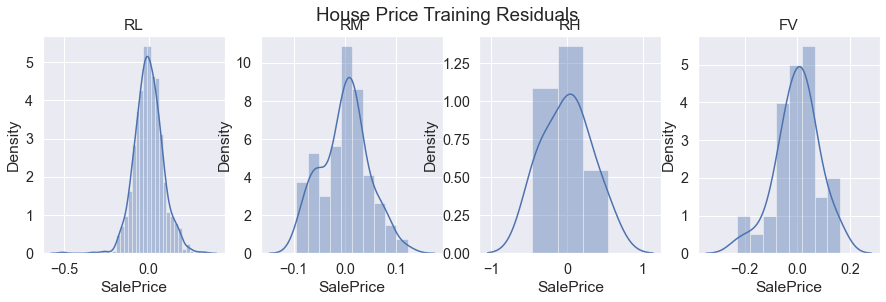

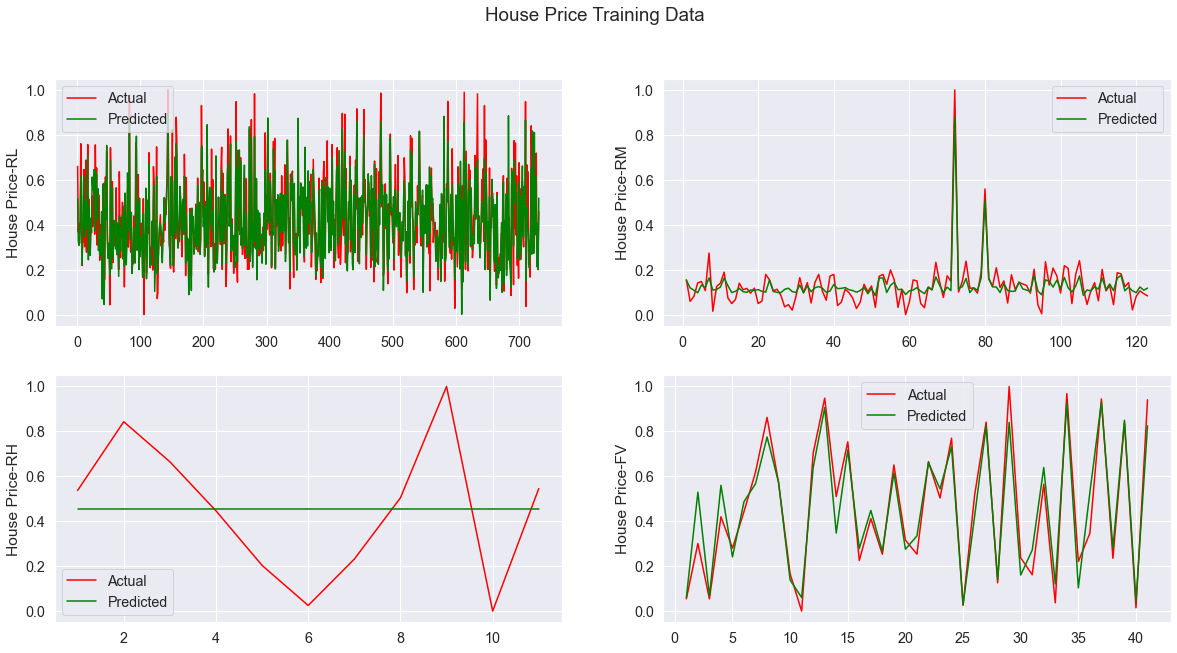

In [63]:
yrlhou_train_pred=rllsohoumodel.predict(xrlhou_train_sm)
yrmhou_train_pred=rmlsohoumodel.predict(xrmhou_train_sm)
yrhhou_train_pred=rhlsohoumodel.predict(xrhhou_train_sm)
yfvhou_train_pred=fvlsohoumodel.predict(xfvhou_train_sm)

yrlhou_train_res=yrlhou_train-yrlhou_train_pred
yrmhou_train_res=yrmhou_train-yrmhou_train_pred
yrhhou_train_res=yrhhou_train-yrhhou_train_pred
yfvhou_train_res=yfvhou_train-yfvhou_train_pred

x1=range(1,len(yrlhou_train)+1)
x2=range(1,len(yrmhou_train)+1)
x3=range(1,len(yrhhou_train)+1)
x4=range(1,len(yfvhou_train)+1)

a=r2_score(y_true=yrlhou_train,y_pred=yrlhou_train_pred)
b=r2_score(y_true=yrmhou_train,y_pred=yrmhou_train_pred)
c=r2_score(y_true=yrhhou_train,y_pred=yrhhou_train_pred)
d=r2_score(y_true=yfvhou_train,y_pred=yfvhou_train_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(c,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test

plt.figure(figsize=(15,4))
plt.suptitle("House Price Training Residuals")
plt.subplot(1,4,1)
sbn.distplot(yrlhou_train_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_train_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_train_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_train_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Training Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_train,c="red",label="Actual")
plt.plot(x1,yrlhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_train,c="red",label="Actual")
plt.plot(x2,yrmhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_train,c="red",label="Actual")
plt.plot(x3,yrhhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_train,c="red",label="Actual")
plt.plot(x4,yfvhou_train_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()

## Find the Prediction & R2 Score on Test data : Ridge Regression

In [64]:
rlhou_test[varcon1]=rlscaler.transform(rlhou_test[varcon1])
rmhou_test[varcon1]=rmscaler.transform(rmhou_test[varcon1])
rhhou_test[varcon1]=rhscaler.transform(rhhou_test[varcon1])
fvhou_test[varcon1]=fvscaler.transform(fvhou_test[varcon1])

yrlhou_test=rlhou_test.pop("SalePrice")
yrmhou_test=rmhou_test.pop("SalePrice")
yrhhou_test=rhhou_test.pop("SalePrice")
yfvhou_test=fvhou_test.pop("SalePrice")

xrlhou_test=rlhou_test
xrmhou_test=rmhou_test
xrhhou_test=rhhou_test
xfvhou_test=fvhou_test

xrlhou_test_sm=sm.add_constant(xrlhou_test,has_constant='add')
xrmhou_test_sm=sm.add_constant(xrmhou_test,has_constant='add')
xrhhou_test_sm=sm.add_constant(xrhhou_test,has_constant='add')
xfvhou_test_sm=sm.add_constant(xfvhou_test,has_constant='add')


yrlhou_test_pred=rlrdghoumodel.predict(xrlhou_test_sm)
yrmhou_test_pred=rmrdghoumodel.predict(xrmhou_test_sm)
yrhhou_test_pred=rhrdghoumodel.predict(xrhhou_test_sm)
yfvhou_test_pred=fvrdghoumodel.predict(xfvhou_test_sm)

a=r2_score(y_true=yrlhou_test,y_pred=yrlhou_test_pred)
b=r2_score(y_true=yrmhou_test,y_pred=yrmhou_test_pred)
c=r2_score(y_true=yrhhou_test,y_pred=yrhhou_test_pred)
d=r2_score(y_true=yfvhou_test,y_pred=yfvhou_test_pred)
print("\tR2 Score-RL\t",round(a,2),"\t","\tR2-Score-RM\t",round(b,2),"\t","\tR2-Score-RH\t",round(c,2),"\t","\tR2-Score-FV\t",round(d,2))
#ybike2018_test

	R2 Score-RL	 0.72 	 	R2-Score-RM	 0.32 	 	R2-Score-RH	 -0.07 	 	R2-Score-FV	 0.6


## Plot the test prediction: Lasso Regression

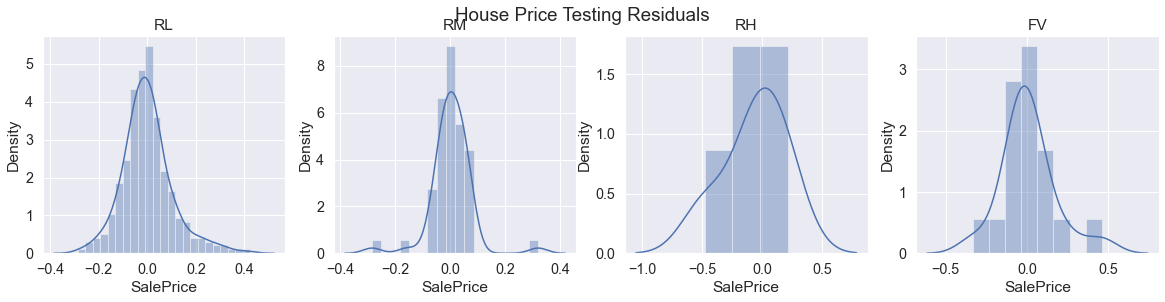

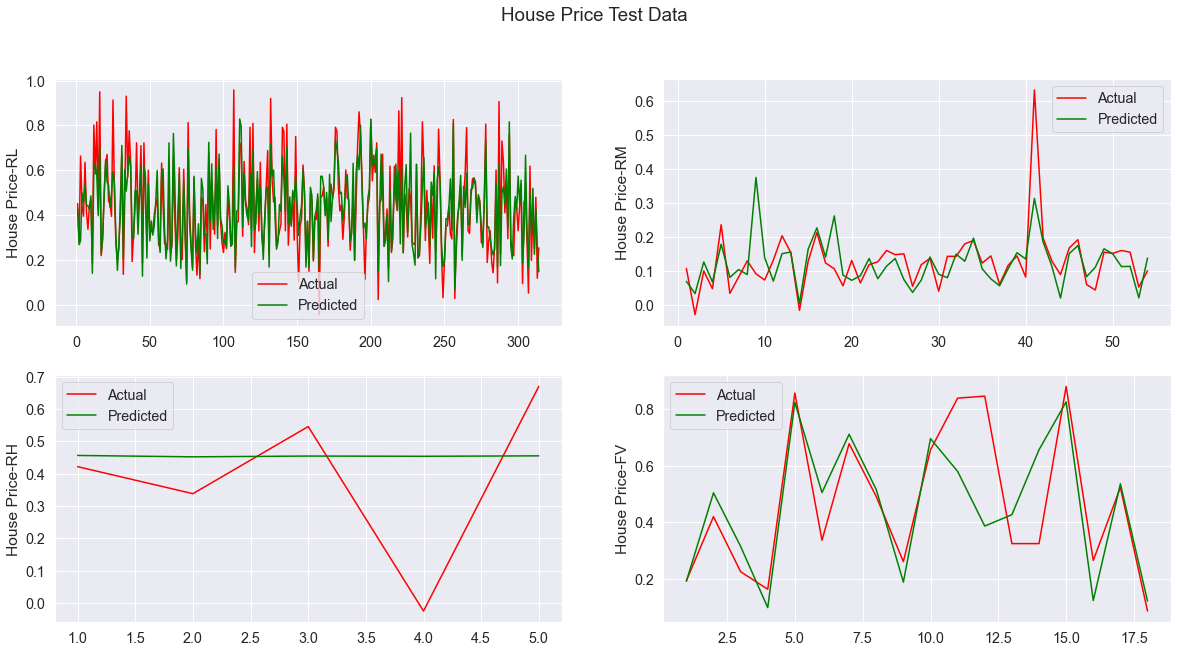

In [65]:
yrlhou_test_res=yrlhou_test-yrlhou_test_pred
yrmhou_test_res=yrmhou_test-yrmhou_test_pred
yrhhou_test_res=yrhhou_test-yrhhou_test_pred
yfvhou_test_res=yfvhou_test-yfvhou_test_pred

x1=range(1,len(yrlhou_test)+1)
x2=range(1,len(yrmhou_test)+1)
x3=range(1,len(yrhhou_test)+1)
x4=range(1,len(yfvhou_test)+1)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.suptitle("House Price Testing Residuals")
sbn.distplot(yrlhou_test_res).set(title="RL")
plt.subplot(1,4,2)
sbn.distplot(yrmhou_test_res).set(title="RM")
plt.subplot(1,4,3)
sbn.distplot(yrhhou_test_res).set(title="RH")
plt.subplot(1,4,4)
sbn.distplot(yfvhou_test_res).set(title="FV")

plt.figure(figsize=(20,10))
plt.suptitle("House Price Test Data")
plt.subplot(2,2,1)
plt.plot(x1,yrlhou_test,c="red",label="Actual")
plt.plot(x1,yrlhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RL")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x2,yrmhou_test,c="red",label="Actual")
plt.plot(x2,yrmhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RM")
plt.legend()
plt.subplot(2,2,3)
plt.plot(x3,yrhhou_test,c="red",label="Actual")
plt.plot(x3,yrhhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-RH")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x4,yfvhou_test,c="red",label="Actual")
plt.plot(x4,yfvhou_test_pred,c="green",label="Predicted")
plt.ylabel("House Price-FV")
plt.legend()